In [1]:
!python3 --version

Python 3.7.7


In [2]:
!pip install keras==2.3.1

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate    
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection



from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence

from keras.preprocessing import sequence
from keras import backend
from keras import backend as K
from keras import models
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout, Flatten, Embedding, Bidirectional, GlobalAveragePooling1D
from keras.layers import Conv1D,Conv2D, MaxPooling2D, MaxPooling1D, GlobalMaxPooling1D

from keras.optimizers import SGD,RMSprop,Adam,Adadelta,Adagrad,Adamax
from keras.regularizers import l2,l1

from keras.callbacks import CSVLogger
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot

from keras.layers.normalization import BatchNormalization
from keras.layers import Conv1D,Conv2D, MaxPooling2D, MaxPooling1D


from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG


from scipy.stats import norm
import numpy as np
import csv
import os

Using TensorFlow backend.


In [4]:
import pandas as pd
import spacy
from tqdm import tqdm
import re
import time
import pickle
import string

import nltk
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, PorterStemmer ,WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nomanashraf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nomanashraf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nomanashraf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from gensim import models
from gensim.models import Word2Vec
from gensim.models.wrappers import FastText
from gensim.models.fasttext import FastText, load_facebook_vectors
from gensim.models.keyedvectors import KeyedVectors

In [6]:
import spacy
#nlp = spacy.load("en_core_web_md")
nlp = spacy.load('en')

In [7]:
#global random seed code to check it is working
#when you set the random seed at start it works like a global variable...
#you do not need to specify random seed in sklearn


_seed = 20

In [8]:
import tensorflow as tf
import random
def reset_seeds(reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(_seed)
    random.seed(_seed)
    tf.compat.v1.set_random_seed(_seed)
    print("RANDOM SEEDS RESET")  # optional

In [9]:
reset_seeds()

RANDOM SEEDS RESET


In [10]:
np.random.seed(_seed) #set random seed to produce same results
print(norm.rvs(10, size = 4))

[10.88389311 10.19586502 10.35753652  7.65673809]


In [11]:


print('Without seed')
print(norm.rvs(10, size = 4))
print(norm.rvs(10, size = 4))

print('With the same seed')
np.random.seed(_seed) 
print(norm.rvs(10, size = 4))
np.random.seed(_seed) # reset the random seed back to 31415
print(norm.rvs(10, size = 4))

print('Without seed')
np.random.seed(None)
print(norm.rvs(10, size = 4))
print(norm.rvs(10, size = 4))

Without seed
[ 8.91516741 10.55969629 10.93946935  9.02151896]
[10.50309684 10.40641447 10.32346101  9.50658912]
With the same seed
[10.88389311 10.19586502 10.35753652  7.65673809]
[10.88389311 10.19586502 10.35753652  7.65673809]
Without seed
[ 9.86631699  9.08222923  9.71381471 10.86939461]
[10.49955403 10.76975562 11.40520515 10.2109167 ]


In [12]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [13]:
import preprocessor as p
#https://pypi.org/project/tweet-preprocessor/

def CleanText(text):
  p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION)
  ctext = p.clean(text.translate(str.maketrans('', '', string.punctuation))) # this line removes all the punctuations
  return ctext

In [14]:
def Remove_StopWords(text):     
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(text)
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    text = ' '.join(wordsFiltered)
    return text  

In [15]:
import re
def Replace_Worlds(text):
    replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would')
    ]
    s = text
    for (pattern, repl) in replacement_patterns:
        s = re.sub(pattern, repl, s)
    return s

In [47]:
abusive_data = "set1_abusive.csv"

In [48]:
df_abuisve = pd.read_csv(abusive_data,usecols=['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply'], sep=',', engine="python")
df_abuisve = df_abuisve[(df_abuisve['find_abusive'] == 1) & (df_abuisve['find_abusive_reply'] == 1)]

df_abuisve = df_abuisve.drop_duplicates(keep=False)
df_abuisve.political = df_abuisve.political.astype(int)
df_abuisve.religion = df_abuisve.religion.astype(int)
df_abuisve.racism = df_abuisve.racism.astype(int)

df_abuisve['word_count'] = df_abuisve['comment'].apply(lambda x: len(str(x).split()))
df_abuisve['char_count'] = df_abuisve['comment'].str.len() ## this also includes spaces


df_abuisve = df_abuisve[df_abuisve['word_count'] <= 75]

df_stats = df_abuisve[['word_count', 'char_count']].agg(['sum','mean'])

print("=========== Dataset Stats ===========")
print(df_stats.shape)
print(df_stats)
print("=========== Dataset Stats ===========")

print("=====================================")
print("Dataset")
print("=====================================")

grouped = df_abuisve.groupby(['topic'])['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply']
print(df_abuisve.groupby(['topic'])['comment'].nunique())
print(df_abuisve.shape)

=========== Dataset Stats ===========
(2, 2)
        word_count     char_count
sum   25858.000000  139209.000000
mean     22.802469     122.759259
=========== Dataset Stats ===========
Dataset
topic
political    225
racism       689
religion     219
Name: comment, dtype: int64
(1134, 15)


In [49]:
nomral_data = "set1_nonabusive.csv"

In [50]:
df_normal = pd.read_csv(nomral_data,usecols=['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply'], sep=',', engine="python")
df_normal = df_normal[(df_normal['find_abusive'] == 0) & (df_normal['find_abusive_reply'] == 0)]

df_normal = df_normal.drop_duplicates(keep=False)
df_normal.political = df_normal.political.astype(int)
df_normal.religion = df_normal.religion.astype(int)
df_normal.racism = df_normal.racism.astype(int)

df_normal['word_count'] = df_normal['comment'].apply(lambda x: len(str(x).split()))
df_normal['char_count'] = df_normal['comment'].str.len() ## this also includes spaces

df_normal = df_normal[df_normal['word_count'] <= 75]

df_stats = df_normal[['word_count', 'char_count']].agg(['sum','mean'])

print("=========== Dataset Stats ===========")
print(df_stats.shape)
print(df_stats)
print("=========== Dataset Stats ===========")


print("=====================================")
print("Dataset")
print("=====================================")


print(df_normal.groupby(['topic'])['comment'].nunique())
print(df_normal.shape)

grouped = df_normal.groupby(['topic'])['id','comment','category','replies','topic','title','date','time','political','religion','racism','find_abusive','find_abusive_reply']

=========== Dataset Stats ===========
(2, 2)
        word_count     char_count
sum   22899.000000  122730.000000
mean     19.521739     104.629156
=========== Dataset Stats ===========
Dataset
topic
political    161
racism       702
religion     308
Name: comment, dtype: int64
(1173, 15)


In [20]:
df = pd.concat([df_normal,df_abuisve])
comments_original = df.comment.tolist()
df.head()

,id,comment,category,replies,topic,title,date,time,political,religion,racism,find_abusive,find_abusive_reply,word_count,char_count
0,UgwrwMF7yHghbMoy-Bp4AaABAg,I m really really proud to be Muslim 💞💞💞💞❤️❤️❤️,"[('proud', 'svp'), ('proud', 'svp')]","['@ imane SOG , wrong answer !', ""It 's full o...",religion,"islam, judaism, and christianity - a conversation",7/27/19,14:58:36,0,1,0,0,0,9,47
1,Ugz5eaDvqlkD4i0k8r54AaABAg,"I dont really care what a person says, I care ...","[('kill', 're'), ('people', 'cds'), ('people',...","['Brother , you are trying to cherry pick vers...",religion,"islam, judaism, and christianity - a conversation",3/1/18,16:20:51,0,1,0,0,0,23,133
2,Ugwf-aGk8N91ciuhuEJ4AaABAg,I just simply love watching this kind of conve...,"[('love', 'asm')]","['The first commandment is God is one , not th...",religion,"islam, judaism, and christianity - a conversation",7/15/19,17:19:44,0,1,0,0,0,17,100
3,Ugz9-4hUrwThGij7Sft4AaABAg,The judge should not have raised her bond that...,"[('power', 'qas')]",['Bail isn ’ t a fine . It ’ s you who doesn ’...,racism,judge flips out after getting flipped off,10/19/19,20:26:51,0,0,1,0,0,16,85
4,Ugyye3eCaEiKwkjlAMR4AaABAg,Religion came when human start thinking more a...,"[('do', 'asm'), ('love', 'asm')]","[""Allah is the god . You mean Mohammad the pro...",religion,the differences between islam and hinduism,1/22/19,5:04:34,0,1,0,0,0,40,248


In [47]:
print(df.shape)

(2307, 15)


In [48]:
df['comment']=df['comment'].apply(Replace_Worlds)
df['comment']=df['comment'].apply(CleanText)
df['comment']=df['comment'].apply(Remove_StopWords)

In [23]:
#run for ngram results
import ast
count = 0
replies = []
for index,row in df.iterrows():
    text_rep = ast.literal_eval(row['replies'])
    
    repl = ""
    for r in text_rep:
        r = Replace_Worlds(r)
        r = CleanText(r)
        r = Remove_StopWords(r)
        repl = repl + " " + r
    
    replies.append(repl)
    
    
    count = count + 1
    #if count == 1:
    #    break

In [49]:
#run for Glove results
import ast
count = 0
replies = []
for index,row in df.iterrows():
    text_rep = ast.literal_eval(row['replies'])
    
    repl = []
    for r in text_rep:
        r = Replace_Worlds(r)
        r = CleanText(r)
        r = Remove_StopWords(r)
        repl.append(r)
    
    replies.append(repl)
    
    
    count = count + 1
    #if count == 1:
    #    break

In [50]:
print(replies[0])

['imane SOG wrong answer', 'It full mistakes']


In [51]:
df['replies']= replies
df.head()

,id,comment,category,replies,topic,title,date,time,political,religion,racism,find_abusive,find_abusive_reply,word_count,char_count
0,UgwrwMF7yHghbMoy-Bp4AaABAg,I really really proud Muslim,"[('proud', 'svp'), ('proud', 'svp')]","[imane SOG wrong answer, It full mistakes]",religion,"islam, judaism, and christianity - a conversation",7/27/19,14:58:36,0,1,0,0,0,9,47
1,Ugz5eaDvqlkD4i0k8r54AaABAg,I dont really care person says I care book say...,"[('kill', 're'), ('people', 'cds'), ('people',...",[Brother trying cherry pick verses justify tho...,religion,"islam, judaism, and christianity - a conversation",3/1/18,16:20:51,0,1,0,0,0,23,133
2,Ugwf-aGk8N91ciuhuEJ4AaABAg,I simply love watching kind conversation Full ...,"[('love', 'asm')]",[The first commandment God one three one know ...,religion,"islam, judaism, and christianity - a conversation",7/15/19,17:19:44,0,1,0,0,0,17,100
3,Ugz9-4hUrwThGij7Sft4AaABAg,The judge raised bond high saying adios Abuse ...,"[('power', 'qas')]",[Bail fine It understand happened But let stop...,racism,judge flips out after getting flipped off,10/19/19,20:26:51,0,0,1,0,0,16,85
4,Ugyye3eCaEiKwkjlAMR4AaABAg,Religion came human start thinking fulfilling ...,"[('do', 'asm'), ('love', 'asm')]",[Allah god You mean Mohammad prophet And marri...,religion,the differences between islam and hinduism,1/22/19,5:04:34,0,1,0,0,0,40,248


In [52]:
target_names = ['0','1']
class_names = ['Non-abusive', 'Abusive']

yTrain = df.find_abusive.values
print(yTrain[0])
print(yTrain)

0
[0 0 0 ... 1 1 1]


In [28]:
_ngram_range = (1,1)
_max_features = None
_analyzer = 'word' #char
Contextual = False

In [306]:
#train data load
train_text = []
count = 0
for index,row in df.iterrows():
    if  Contextual:
        text = str(row['comment'] + ' ' + row['replies'])
    else:
        text = str(row['comment'])
    train_text.append(text)
    count = count + 1

print(train_text[0])
print("\n")

I really really proud Muslim




In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer=TfidfVectorizer(smooth_idf=True,use_idf=True, ngram_range= _ngram_range, analyzer = _analyzer, max_features=_max_features)
X_train = tfIdfVectorizer.fit_transform(train_text).toarray()
print(X_train[0])
print( "Shape of final Ngram vector:" + str(X_train.shape))



[0. 0. 0. ... 0. 0. 0.]
Shape of final Ngram vector:(2307, 6296)


In [308]:
xTrain, yTrain = X_train, yTrain

In [309]:
print(xTrain.shape)
print(yTrain.shape)

(2307, 6296)
(2307,)


In [29]:
scorer = make_scorer(f1_score, average = 'weighted')
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label (avg)')
    plt.xlabel('Predicted label (avg)\naccuracy (avg)={:0.4f}; misclass (avg)={:0.4f}'.format(accuracy, misclass))
    plt.grid(None)
    plt.grid(b=None)
    plt.show()

In [31]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
def Plot_ROC(clf,cv,X, y,_title,algoname= ' '):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(9, 9))
    for i, (train, test) in enumerate(cv.split(X, y)):
        #clf.fit(X[train], y[train])
        viz = plot_roc_curve(clf, X[test], y[test],
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=_title)
    ax.legend(loc="lower right")
    plt.show()

In [87]:
def Save_Model(filename,model):
    pickle.dump(model, open(filename, 'wb'))
    print("Model Saved!")

In [217]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
def LR_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    clf = LogisticRegression(random_state=_seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    X_test_mean = []
    y_test_mean = []
    y_pred_mean = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(9, 9))
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        
        X_test_mean.append(X_test)
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
        
        viz = plot_roc_curve(clf, X_test, y_test,
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        

    
    
        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="")
    ax.legend(loc="lower right")
    plt.show()
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.852814
Precision: 0.907216
Recall: 0.778761
F1 score: 0.838095
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.92      0.87       118
           1       0.91      0.78      0.84       113

    accuracy                           0.85       231
   macro avg       0.86      0.85      0.85       231
weighted avg       0.86      0.85      0.85       231

=== Confusion Matrix ===
[[109   9]
 [ 25  88]]


Iteration:2
=== Scores ===
Accuracy: 0.870130
Precision: 0.867257
Recall: 0.867257
F1 score: 0.867257
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       118
           1       0.87      0.87      0.87       113

    accuracy                           0.87       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.87      0.87      0.87       231

=== Confusion Matrix ===
[[103  

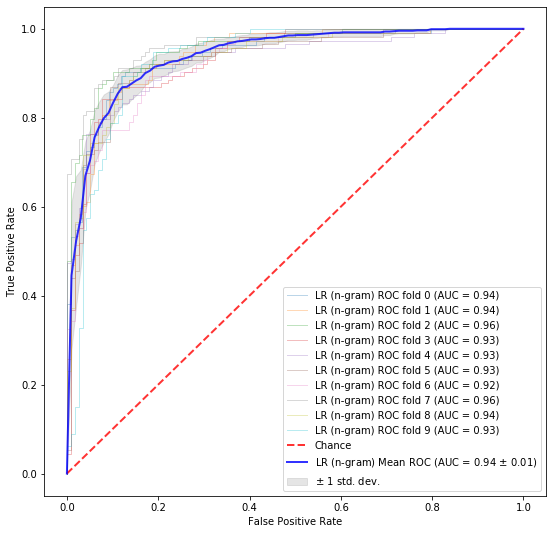



Averages
Accuracy: 0.8578260869565216
Precision: 0.8924737335225826
Recall: 0.8086943021269988
F1 measure: 0.8481609381116062
Confusion Matrix

[[106.2  11.1]
 [ 21.7  91.7]]


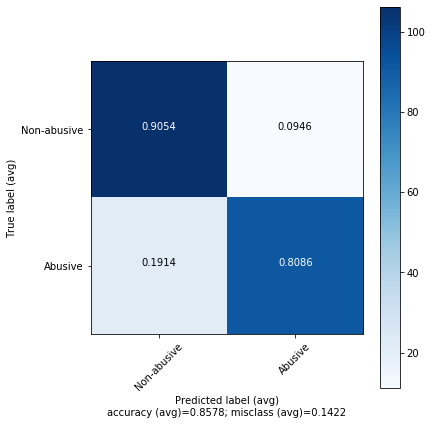

In [105]:
lr, cv = LR_Model(xTrain, yTrain,'LR (n-gram) ', target_names, class_names)

In [106]:
def MLP_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    clf = MLPClassifier(random_state=_seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    y_test_mean = []
    y_pred_mean = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(9, 9))
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
        
        viz = plot_roc_curve(clf, X_test, y_test,
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        

    
    
        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="")
    ax.legend(loc="lower right")
    plt.show()
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.818182
Precision: 0.819820
Recall: 0.805310
F1 score: 0.812500
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       118
           1       0.82      0.81      0.81       113

    accuracy                           0.82       231
   macro avg       0.82      0.82      0.82       231
weighted avg       0.82      0.82      0.82       231

=== Confusion Matrix ===
[[98 20]
 [22 91]]


Iteration:2
=== Scores ===
Accuracy: 0.852814
Precision: 0.831933
Recall: 0.876106
F1 score: 0.853448
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       118
           1       0.83      0.88      0.85       113

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231

=== Confusion Matrix ===
[[98 20]
 [

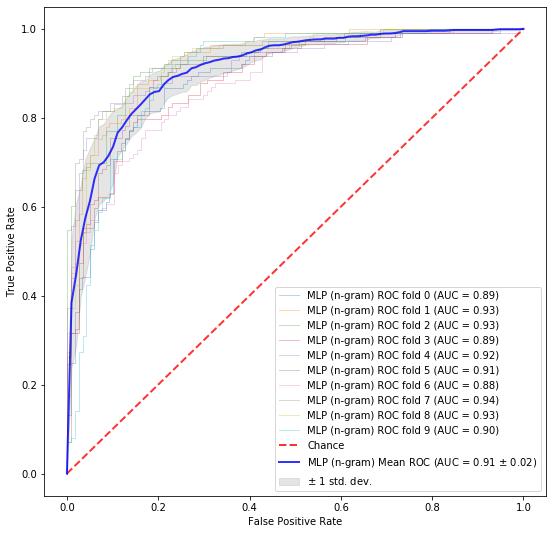



Averages
Accuracy: 0.8318313570487484
Precision: 0.8263603050101029
Recall: 0.8342803912435957
F1 measure: 0.8300013357536384
Confusion Matrix

[[97.3 20. ]
 [18.8 94.6]]


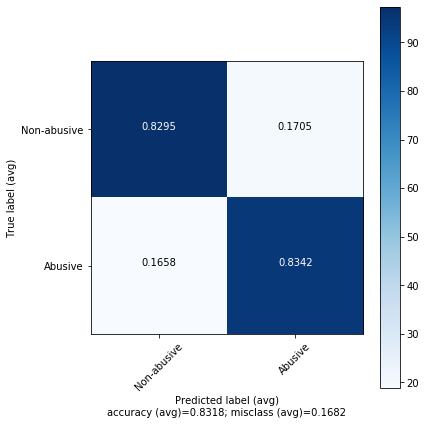

In [107]:
mlp, cv = MLP_Model(xTrain, yTrain,'MLP (n-gram) ', target_names, class_names)

In [218]:
def AB_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    clf = AdaBoostClassifier(random_state=_seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    y_test_mean = []
    y_pred_mean = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(9, 9))
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
        
        viz = plot_roc_curve(clf, X_test, y_test,
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
    
        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="")
    ax.legend(loc="lower right")
    plt.show()
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.939394
Precision: 0.954128
Recall: 0.920354
F1 score: 0.936937
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       118
           1       0.95      0.92      0.94       113

    accuracy                           0.94       231
   macro avg       0.94      0.94      0.94       231
weighted avg       0.94      0.94      0.94       231

=== Confusion Matrix ===
[[113   5]
 [  9 104]]


Iteration:2
=== Scores ===
Accuracy: 0.943723
Precision: 0.954545
Recall: 0.929204
F1 score: 0.941704
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       118
           1       0.95      0.93      0.94       113

    accuracy                           0.94       231
   macro avg       0.94      0.94      0.94       231
weighted avg       0.94      0.94      0.94       231

=== Confusion Matrix ===
[[113  

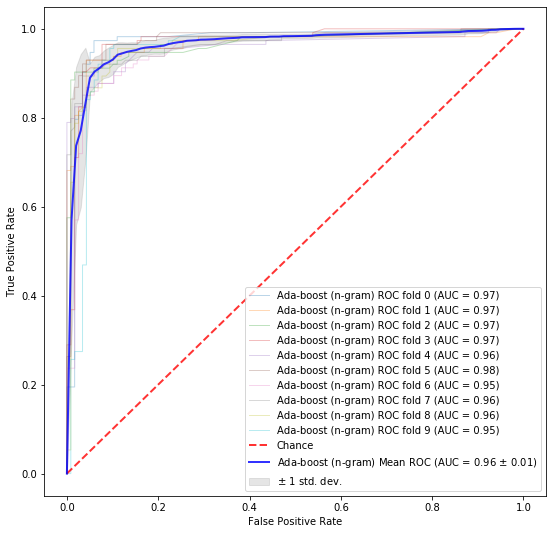



Averages
Accuracy: 0.9232599284773197
Precision: 0.946046835035373
Recall: 0.895947834187238
F1 measure: 0.9196129781316189
Confusion Matrix

[[111.4   5.9]
 [ 11.8 101.6]]


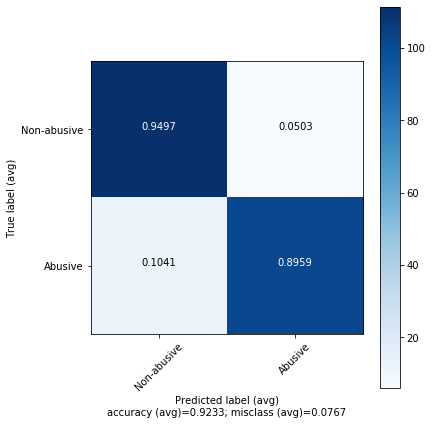

Model Saved!


In [219]:
adb, cv  = AB_Model(xTrain, yTrain,'Ada-boost (n-gram) ', target_names, class_names)
Save_Model("adb-context" + ".sav", adb)

In [110]:
 def RF_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    clf = RandomForestClassifier(random_state=_seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    y_test_mean = []
    y_pred_mean = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(9, 9))
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
        
        viz = plot_roc_curve(clf, X_test, y_test,
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
    
        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="")
    ax.legend(loc="lower right")
    plt.show()
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.909091
Precision: 0.918182
Recall: 0.893805
F1 score: 0.905830
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       118
           1       0.92      0.89      0.91       113

    accuracy                           0.91       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.91      0.91      0.91       231

=== Confusion Matrix ===
[[109   9]
 [ 12 101]]


Iteration:2
=== Scores ===
Accuracy: 0.883117
Precision: 0.883929
Recall: 0.876106
F1 score: 0.880000
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       118
           1       0.88      0.88      0.88       113

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

=== Confusion Matrix ===
[[105  

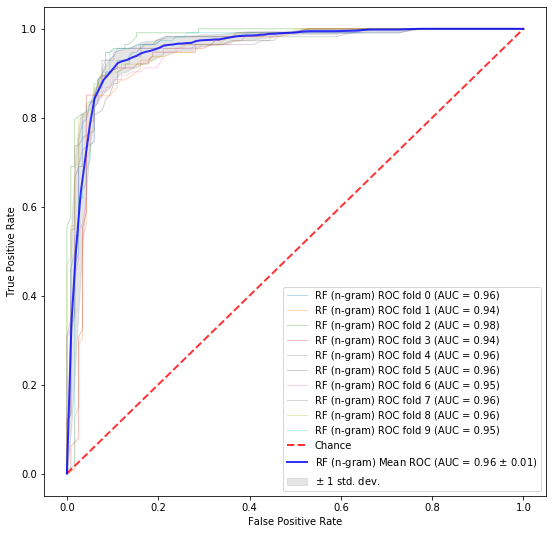



Averages
Accuracy: 0.8964106907585169
Precision: 0.9174029940647589
Recall: 0.8677767427418102
F1 measure: 0.8915560198523182
Confusion Matrix

[[108.4   8.9]
 [ 15.   98.4]]


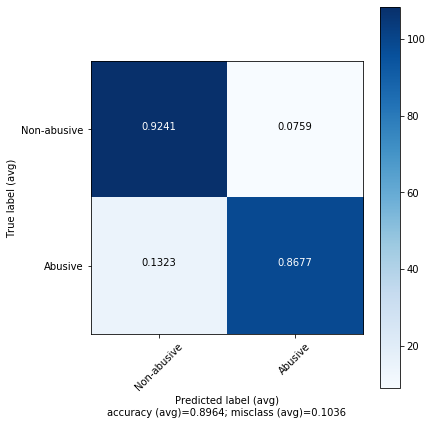

In [111]:
rf, cv = RF_Model(xTrain, yTrain,'RF (n-gram) ', target_names, class_names)

In [112]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
def SVM_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    clf = SVC(probability=True,class_weight='balanced', random_state=_seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    y_test_mean = []
    y_pred_mean = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(9, 9))
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
        
        viz = plot_roc_curve(clf, X_test, y_test,
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
    

        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="")
    ax.legend(loc="lower right")
    plt.show()
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.848485
Precision: 0.890000
Recall: 0.787611
F1 score: 0.835681
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       118
           1       0.89      0.79      0.84       113

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231

=== Confusion Matrix ===
[[107  11]
 [ 24  89]]


Iteration:2
=== Scores ===
Accuracy: 0.870130
Precision: 0.867257
Recall: 0.867257
F1 score: 0.867257
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       118
           1       0.87      0.87      0.87       113

    accuracy                           0.87       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.87      0.87      0.87       231

=== Confusion Matrix ===
[[103  

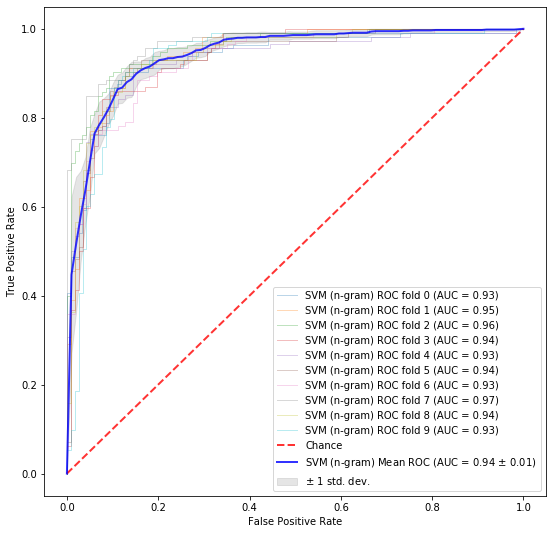



Averages
Accuracy: 0.8630359495576887
Precision: 0.9015088878975757
Recall: 0.8104564508616676
F1 measure: 0.8532625468529256
Confusion Matrix

[[107.2  10.1]
 [ 21.5  91.9]]


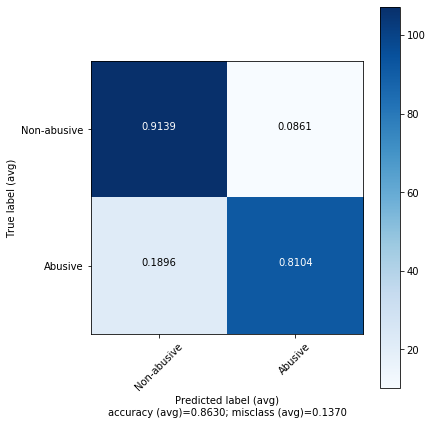

In [113]:
svm,cv = SVM_Model(xTrain, yTrain,'SVM (n-gram) ', target_names, class_names)

In [114]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
def NB_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    clf = GaussianNB()
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    y_test_mean = []
    y_pred_mean = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(9, 9))
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
        
        viz = plot_roc_curve(clf, X_test, y_test,
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
    

        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="")
    ax.legend(loc="lower right")
    plt.show()
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.683983
Precision: 0.626582
Recall: 0.876106
F1 score: 0.730627
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.50      0.62       118
           1       0.63      0.88      0.73       113

    accuracy                           0.68       231
   macro avg       0.72      0.69      0.67       231
weighted avg       0.72      0.68      0.67       231

=== Confusion Matrix ===
[[59 59]
 [14 99]]


Iteration:2
=== Scores ===
Accuracy: 0.653680
Precision: 0.600000
Recall: 0.876106
F1 score: 0.712230
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.44      0.57       118
           1       0.60      0.88      0.71       113

    accuracy                           0.65       231
   macro avg       0.69      0.66      0.64       231
weighted avg       0.70      0.65      0.64       231

=== Confusion Matrix ===
[[52 66]
 [

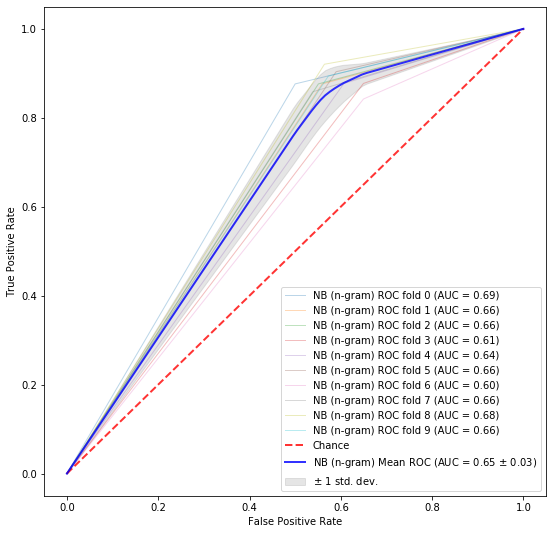



Averages
Accuracy: 0.6471805006587614
Precision: 0.5959399881144499
Recall: 0.8800884955752212
F1 measure: 0.7105143168873418
Confusion Matrix

[[49.5 67.8]
 [13.6 99.8]]


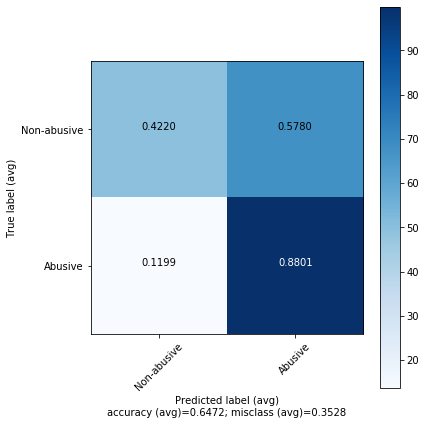

In [115]:
nb,cv = NB_Model(xTrain, yTrain,'NB (n-gram) ', target_names, class_names)

In [315]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
def DT_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    clf = DecisionTreeClassifier(random_state=_seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    y_test_mean = []
    y_pred_mean = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(9, 9))
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
        
        viz = plot_roc_curve(clf, X_test, y_test,
                             name= algoname + 'ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
    

        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label= algoname + r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="")
    ax.legend(loc="lower right")
    plt.show()
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.887446
Precision: 0.914286
Recall: 0.849558
F1 score: 0.880734
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       118
           1       0.91      0.85      0.88       113

    accuracy                           0.89       231
   macro avg       0.89      0.89      0.89       231
weighted avg       0.89      0.89      0.89       231

=== Confusion Matrix ===
[[109   9]
 [ 17  96]]


Iteration:2
=== Scores ===
Accuracy: 0.870130
Precision: 0.887850
Recall: 0.840708
F1 score: 0.863636
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       118
           1       0.89      0.84      0.86       113

    accuracy                           0.87       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.87      0.87      0.87       231

=== Confusion Matrix ===
[[106  

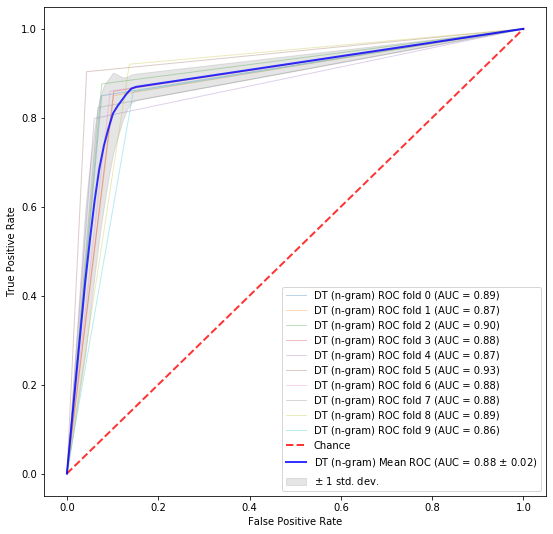



Averages
Accuracy: 0.8838208168642951
Precision: 0.9028038482765195
Recall: 0.8571650364850179
F1 measure: 0.8787227565215389
Confusion Matrix

[[106.7  10.6]
 [ 16.2  97.2]]


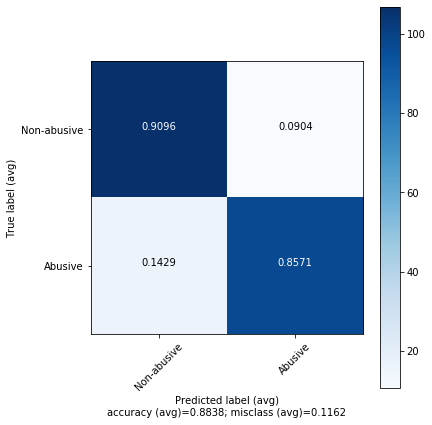

Model Saved!


In [316]:
dt,cv = DT_Model(xTrain, yTrain,'DT (n-gram) ', target_names, class_names)
Save_Model("dt-context" + ".sav", dt)

In [118]:
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

def VC_Model(X, y,algoname= ' ', _target_names = [], _class_names = []):
    
    clf1 = LogisticRegression(random_state=_seed)
    clf2 = RandomForestClassifier(random_state=_seed)
    clf3 = GaussianNB()
    clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
    
    
    kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    y_test_mean = []
    y_pred_mean = []


    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        y_test_mean.append(y_test)
        y_pred_mean.append(y_pred)
        
    

        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred)
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
    

        
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    

    
    return clf, kfold
    

Iteration:1
=== Scores ===
Accuracy: 0.896104
Precision: 0.893805
Recall: 0.893805
F1 score: 0.893805
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       118
           1       0.89      0.89      0.89       113

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[106  12]
 [ 12 101]]


Iteration:2
=== Scores ===
Accuracy: 0.883117
Precision: 0.864407
Recall: 0.902655
F1 score: 0.883117
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       118
           1       0.86      0.90      0.88       113

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

=== Confusion Matrix ===
[[102  

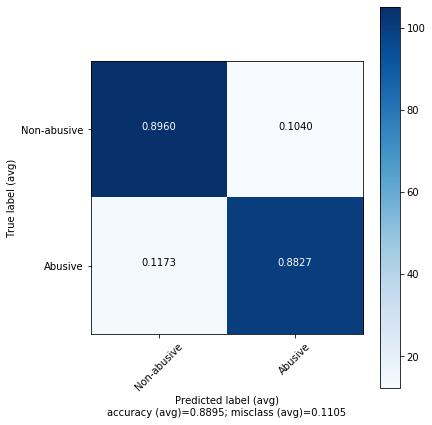

In [119]:
vc,cv = VC_Model(xTrain, yTrain,'VC (n-gram) ', target_names, class_names)

In [32]:
glove_vec = True
if glove_vec:
    from gensim.models.keyedvectors import KeyedVectors
    glove_path = "/Users/nomanashraf/Documents/gensim_glove.6B.300d.txt"
    w2vec_model = KeyedVectors.load_word2vec_format(glove_path, binary=False)
    print("GloVe Model Loaded!")
else:
    #load word_to_vector_file
    w2v_file = "/Users/nomanashraf/Documents/GoogleNews-vectors-negative300.bin"
    #w2vec_model = models.KeyedVectors.load_word2vec_format(w2v_file, binary=True, limit=1000000)
    w2vec_model = models.KeyedVectors.load_word2vec_format(w2v_file, binary=True)
    print("W2Vec Model Loaded!")

GloVe Model Loaded!


In [53]:
#for 3d shape
def Generate_Glove_Vectors(w2vmodel , sentences, word_size):
    vector = w2vmodel['easy']
    #print( "Shape of Vector:" + str(vector.shape))  
    X_train_Vector = []
    for sen in sentences:
        vector_list = []
        list_of_words = str(sen).split(" ")
        #print(len(list_of_words))
        for word in list_of_words:
            if word in w2vmodel.vocab:
                vector_list.append(w2vmodel[word])
                
        if len(vector_list) > word_size:
            vector_list = vector_list[0:word_size]        
        #print(len(vector_list))        
        
        for i in range(len(vector_list),word_size):
            vector_list.append(np.random.uniform(-0.1, 0.1, 300))
            
        
        matrix_2d = np.array(vector_list)
        #average_sentence_vector = np.mean(matrix_2d, axis = 0)
        X_train_Vector.append(matrix_2d)
            
    X = np.array(X_train_Vector)
    print(X.shape)
    return X

In [54]:
count = 0
Xvectors= []
for index,row in df.iterrows():
    text_rep = row['replies']
    #print(text_rep)
    matrix_3d = Generate_Glove_Vectors(w2vec_model, text_rep, word_size = 24)
    matrix_2d = np.mean(matrix_3d, axis = 0)
    Xvectors.append(matrix_2d)

        
    count = count + 1
    #if count == 1:
    #    break

xReplies = np.array(Xvectors)

print("Final Shape:")
print(xReplies.shape)
    

(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(2, 24, 300)
(1, 24, 300)
(3, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(2, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)

(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(4, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(4, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(4, 24, 300)
(2, 24, 300)
(1, 24, 300)
(3, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(3, 24, 300)
(3, 24, 300)
(2, 24, 300)
(3, 24, 300)
(1, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(2, 24, 300)

(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(2, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(4, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(1, 24, 300)
(1, 24, 300)
(4, 24, 300)
(4, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(1, 24, 300)
(3, 24, 300)
(2, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(2, 24, 300)
(3, 24, 300)
(3, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(4, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(4, 24, 300)
(3, 24, 300)
(2, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(4, 24, 300)
(5, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(4, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)

(1, 24, 300)
(2, 24, 300)
(3, 24, 300)
(1, 24, 300)
(4, 24, 300)
(4, 24, 300)
(5, 24, 300)
(4, 24, 300)
(3, 24, 300)
(5, 24, 300)
(5, 24, 300)
(2, 24, 300)
(1, 24, 300)
(4, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(2, 24, 300)
(3, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(2, 24, 300)
(3, 24, 300)
(5, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(3, 24, 300)
(2, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(2, 24, 300)
(5, 24, 300)
(3, 24, 300)
(5, 24, 300)
(5, 24, 300)
(1, 24, 300)
(3, 24, 300)
(5, 24, 300)
(4, 24, 300)
(1, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(2, 24, 300)
(1, 24, 300)
(1, 24, 300)
(3, 24, 300)
(1, 24, 300)
(2, 24, 300)
(5, 24, 300)
(1, 24, 300)
(1, 24, 300)
(3, 24, 300)
(2, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(4, 24, 300)
(1, 24, 300)
(5, 24, 300)
(1, 24, 300)
(4, 24, 300)
(5, 24, 300)
(1, 24, 300)
(4, 24, 300)
(4, 24, 300)
(3, 24, 300)
(4, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)

In [55]:
xData = Generate_Glove_Vectors(w2vec_model, df.comment.tolist(), word_size = 24)

(2307, 24, 300)


In [116]:
def Generate_Glove_Vectors(w2vmodel , sentences):
    vector = w2vmodel['easy']
    #print( "Shape of Vector:" + str(vector.shape))  
    X_train_Vector = []
    for sen in sentences:
        vector_list = []
        list_of_words = str(sen).split(" ")
        print(len(list_of_words))
        for word in list_of_words:
            if word in w2vmodel.vocab:
                #print(word)
                vector_list.append(w2vmodel[word])
            #else:
            #    vector_list.append(np.random.uniform(-0.1, 0.1, 300))
        if len(vector_list) <= 0:
            vector_list.append(np.random.uniform(-0.1, 0.1, 300))
        
        matrix_2d = np.array(vector_list)
        average_sentence_vector = np.mean(matrix_2d, axis = 0)
        X_train_Vector.append(average_sentence_vector)
            
    X = np.array(X_train_Vector)
    print(X.shape)
    return X

In [34]:
count = 0
Xvectors= []
for index,row in df.iterrows():
    text_rep = row['replies']
    matrix_2d = Generate_Glove_Vectors(w2vec_model, text_rep)
    x,y = matrix_2d.shape
    if x > 1:
        vec = []
        for m in matrix_2d:
            vec.append(m)
        m2d = np.array(vec)
        xv = np.mean(m2d, axis = 0)
        Xvectors.append(xv)
        
    else:
        xv_ = np.mean(matrix_2d, axis = 0)
        Xvectors.append(xv_)
        
    count = count + 1
    #if count == 5:
    #    break

xReplies = np.array(Xvectors)
print(xReplies.shape)
    

(2, 300)
(1, 300)
(2, 300)
(1, 300)
(1, 300)
(2, 300)
(3, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(2, 300)
(1, 300)
(4, 300)
(1, 300)
(1, 300)
(1, 300)
(4, 300)
(2, 300)
(1, 300)
(3, 300)
(4, 300)
(1, 300)
(1, 300)
(1, 300)
(4, 300)
(1, 300)
(1, 300)
(1, 300)
(5, 300)
(2, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(2, 300)
(1, 300)
(3, 300)
(1, 300)
(1, 300)
(2, 300)
(2, 300)
(1, 300)
(1, 300)
(2, 300)
(1, 300)
(2, 300)
(5, 300)
(1, 300)
(1, 300)
(5, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(5, 300)
(2, 300)
(4, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(2, 300)
(1, 300)
(2, 300)
(1, 300)
(1, 300)
(5, 300)
(1, 300)
(2, 300)
(3, 300)
(1, 300)
(2, 300)
(2, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(1, 300)
(2, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(2, 300)
(1, 300)
(

(5, 300)
(1, 300)
(2, 300)
(5, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(5, 300)
(1, 300)
(4, 300)
(3, 300)
(1, 300)
(1, 300)
(4, 300)
(1, 300)
(1, 300)
(5, 300)
(1, 300)
(5, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(1, 300)
(2, 300)
(1, 300)
(4, 300)
(1, 300)
(5, 300)
(2, 300)
(1, 300)
(2, 300)
(2, 300)
(4, 300)
(4, 300)
(1, 300)
(1, 300)
(2, 300)
(4, 300)
(5, 300)
(5, 300)
(4, 300)
(4, 300)
(3, 300)
(5, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(4, 300)
(2, 300)
(5, 300)
(2, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(2, 300)
(2, 300)
(5, 300)
(2, 300)
(2, 300)
(3, 300)
(2, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(4, 300)
(1, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(4, 300)
(1, 300)
(3, 300)
(4, 300)
(4, 300)
(4, 300)
(1, 300)
(2, 300)
(5, 300)
(3, 300)
(2, 300)
(5, 300)
(3, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(5, 300)
(5, 300)
(1, 300)
(1, 300)
(5, 300)
(

(5, 300)
(5, 300)
(3, 300)
(2, 300)
(4, 300)
(2, 300)
(1, 300)
(5, 300)
(1, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(2, 300)
(3, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(2, 300)
(1, 300)
(1, 300)
(2, 300)
(5, 300)
(2, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(1, 300)
(5, 300)
(2, 300)
(3, 300)
(3, 300)
(4, 300)
(5, 300)
(1, 300)
(4, 300)
(4, 300)
(1, 300)
(1, 300)
(1, 300)
(3, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(3, 300)
(1, 300)
(2, 300)
(1, 300)
(3, 300)
(5, 300)
(5, 300)
(2, 300)
(5, 300)
(1, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(4, 300)
(3, 300)
(5, 300)
(4, 300)
(1, 300)
(3, 300)
(5, 300)
(4, 300)
(5, 300)
(3, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(1, 300)
(1, 300)
(4, 300)
(4, 300)
(2, 300)
(1, 300)
(1, 300)
(4, 300)
(3, 300)
(5, 300)
(2, 300)
(2, 300)
(2, 300)
(5, 300)
(5, 300)
(1, 300)
(3, 300)
(5, 300)
(3, 300)
(2, 300)
(1, 300)
(4, 300)
(1, 300)
(5, 300)
(4, 300)
(5, 300)
(5, 300)
(5, 300)
(5, 300)
(

In [117]:
xData = Generate_Glove_Vectors(w2vec_model, df.comment.tolist())

5
15
11
9
28
3
13
7
10
8
12
38
5
21
4
17
9
17
19
25
4
11
10
15
30
5
7
5
23
38
5
15
7
16
4
6
11
7
22
13
5
6
14
5
4
16
4
6
3
17
12
8
5
15
15
7
5
5
25
5
14
5
10
4
15
7
5
5
3
7
4
21
7
10
17
6
17
18
16
9
6
14
12
6
60
24
5
4
3
6
5
7
4
3
13
26
15
19
8
7
4
34
45
17
3
3
6
6
10
15
11
9
8
8
4
36
5
3
14
18
4
18
17
19
8
2
8
4
5
27
15
13
17
20
15
10
9
41
9
7
7
9
22
13
2
5
6
7
4
4
8
2
20
4
6
10
2
9
6
3
13
8
23
7
3
3
11
16
6
4
7
32
15
7
2
5
12
7
31
6
9
9
8
7
7
7
7
24
4
3
3
6
7
14
6
3
17
18
25
17
2
5
6
9
5
5
21
6
4
9
3
12
13
16
11
9
4
12
4
4
9
13
7
7
3
13
34
9
15
23
10
25
16
23
25
4
3
12
3
26
5
3
22
13
8
17
7
10
15
13
7
11
21
5
11
44
9
16
10
7
14
11
19
8
1
19
33
4
9
17
16
16
18
9
19
13
12
41
20
7
9
6
7
7
18
6
5
9
30
5
12
8
7
6
9
8
6
24
26
7
9
12
11
22
13
33
17
10
4
13
8
36
7
21
9
38
16
5
15
2
6
8
15
5
3
18
12
15
27
70
17
4
2
17
5
6
6
7
3
5
17
15
7
14
3
6
6
5
6
7
21
3
2
4
6
4
5
5
13
18
6
5
7
7
16
3
14
12
11
11
3
13
12
17
4
37
11
24
6
7
11
25
37
5
4
6
19
9
13
4
14
7
13
2
11
17
21
20
11
18
5
5
9
5
5
6
13


In [56]:
Contextual = True

if Contextual:
    xTrain = np.mean([ xData, xReplies ], axis=0)
    #xTrain = np.concatenate([ xData, xReplies ], axis=1)
else:
    xTrain = xData




In [57]:
print(xTrain.shape)
print(yTrain.shape)

(2307, 24, 300)
(2307,)


In [58]:
def Shape_Reshaper(_xTrain, _xTest):    
    xTrain_arr = _xTrain
    xTest_arr = _xTest


    dim1,dim3 = _xTrain.shape
    dim2 = 1        

    xTrain = np.reshape(_xTrain, (dim1, dim2 , dim3)) #xTrain_arr.reshape(dim1, dim2 , dim3)
    print(xTrain.shape)       

    t_dim1,t_dim3 = _xTest.shape
    t_dim2 = 1
    xTest = xTest_arr.reshape(t_dim1, t_dim2 , t_dim3)
    print(xTest.shape)

    _input_shape = (dim2,dim3)
    print(_input_shape)


    return xTrain,xTest,_input_shape

In [59]:
def Shape_Reshaper_Vec(_xTrain, _xTest): 

    print(_xTrain.shape)
    print(_xTest.shape)

    dim1, dim2, dim3 = _xTrain.shape    
    xTrain = _xTrain
    print(xTrain.shape)        

    t_dim1, t_dim2, t_dim3 = _xTest.shape
    xTest = _xTest
    print(xTest.shape)

    _input_shape = (dim2,dim3)
    print(_input_shape)

    return xTrain,xTest,_input_shape


In [60]:
def Generate_Graph(history):
                # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [61]:
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint, EarlyStopping
class EarlyStoppingByLossVal(Callback):
    
    def __init__(self, monitor='val_loss', value=0.0001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [196]:

def CNN1D(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='mean_squared_error', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.001), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 1
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential()

        model.add(Conv1D(4, kernel_size=1, strides= 1, padding='same',activation='tanh', input_shape=_input_shape,kernel_regularizer= _kernel_regularizer, bias_regularizer= _bias_regularizer))
        model.add(Dropout(0.2))

        model.add(Dense(16 ,activation='tanh'))
        model.add(Dropout(0.2))

        model.add(Dense(32 ,activation='relu'))
        model.add(Dropout(0.2))
        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='sigmoid'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.09, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred )
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

In [197]:
reset_seeds()
cnn = CNN1D(xTrain, yTrain, target_names, class_names, 'CNN1D (Glove) ',  _epochs = 100, _verbose=2, graph = True, _optimizer = Adam(lr=0.0001))

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_192 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_707 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
dense_656 (Dense)            (None, 24, 16)            80        
_________________________________________________________________
dropout_708 (Dropout)        (None, 24, 16)            0         
_________________________________________________________________
dense_657 (Dense)            (None, 24, 32)            544       
_________________________________________________________________
dropout_709 (Dropout)        (None, 24, 32)            

KeyboardInterrupt: 

In [173]:

def CNN1D_MaxPooling(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='mean_squared_error', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.001), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 1
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential()

        model.add(Conv1D(4, kernel_size=1, strides= 1, padding='same',activation='tanh', input_shape=_input_shape,kernel_regularizer= _kernel_regularizer, bias_regularizer= _bias_regularizer))
        model.add(Dropout(0.2))
        
        model.add(MaxPooling1D(pool_size=1, strides=1, padding='valid', data_format='channels_last'))
        model.add(Dropout(0.2))

        model.add(Dense(16 ,activation='tanh'))
        model.add(Dropout(0.2))

        model.add(Dense(32 ,activation='relu'))
        model.add(Dropout(0.2))
        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='sigmoid'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.06, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        
        # save model and architecture to single file
        model.save("model.h5")
        print("Saved model to disk")
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred )
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_162 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_517 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 24, 4)             0         
_________________________________________________________________
dropout_518 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
dense_486 (Dense)            (None, 24, 16)            80        
_________________________________________________________________
dropout_519 (Dropout)        (None, 24, 16)            

Epoch 44/100
1868/1868 [==============================] - 1s 400us/step - loss: 0.1325 - accuracy: 0.8298 - val_loss: 0.1192 - val_accuracy: 0.8510
Epoch 45/100
1868/1868 [==============================] - 1s 374us/step - loss: 0.1244 - accuracy: 0.8437 - val_loss: 0.1210 - val_accuracy: 0.8510
Epoch 46/100
1868/1868 [==============================] - 1s 361us/step - loss: 0.1294 - accuracy: 0.8340 - val_loss: 0.1106 - val_accuracy: 0.8702
Epoch 47/100
1868/1868 [==============================] - 1s 390us/step - loss: 0.1237 - accuracy: 0.8415 - val_loss: 0.1141 - val_accuracy: 0.8606
Epoch 48/100
1868/1868 [==============================] - 1s 359us/step - loss: 0.1230 - accuracy: 0.8442 - val_loss: 0.0987 - val_accuracy: 0.8894
Epoch 49/100
1868/1868 [==============================] - 1s 380us/step - loss: 0.1240 - accuracy: 0.8426 - val_loss: 0.1109 - val_accuracy: 0.8702
Epoch 50/100
1868/1868 [==============================] - 1s 382us/step - loss: 0.1197 - accuracy: 0.8480 - val_

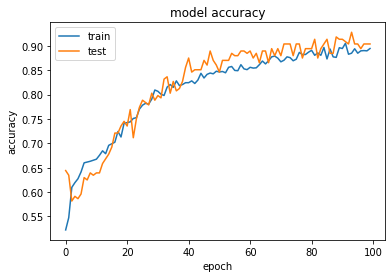

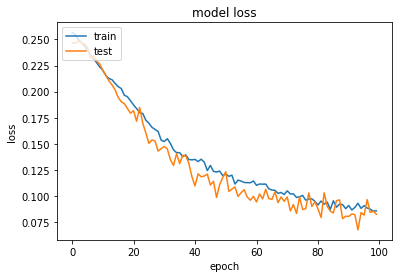

Iteration:1
=== Scores ===
Accuracy: 0.904762
Precision: 0.895652
Recall: 0.911504
F1 score: 0.903509
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       118
           1       0.90      0.91      0.90       113

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[106  12]
 [ 10 103]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_163 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_521 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1868/1868 [==============================] - 1s 493us/step - loss: 0.1149 - accuracy: 0.8474 - val_loss: 0.1284 - val_accuracy: 0.8077
Epoch 42/100
1868/1868 [==============================] - 1s 521us/step - loss: 0.1121 - accuracy: 0.8619 - val_loss: 0.1146 - val_accuracy: 0.8365
Epoch 43/100
1868/1868 [==============================] - 1s 542us/step - loss: 0.1124 - accuracy: 0.8490 - val_loss: 0.1370 - val_accuracy: 0.7885
Epoch 44/100
1868/1868 [==============================] - 1s 499us/step - loss: 0.1128 - accuracy: 0.8533 - val_loss: 0.1401 - val_accuracy: 0.7740
Epoch 45/100
1868/1868 [==============================] - 1s 514us/step - loss: 0.1125 - accuracy: 0.8496 - val_loss: 0.1260 - val_accuracy: 0.8125
Epoch 46/100
1868/1868 [==============================] - 1s 591us/step - loss: 0.1101 - accuracy: 0.8597 - val_loss: 0.1249 - val_accuracy: 0.8173
Epoch 47/100
1868/1868 [==============================] - 1s 566us/step - loss: 0.1085 - accuracy: 0.8571 - val_

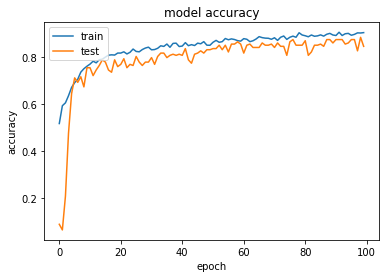

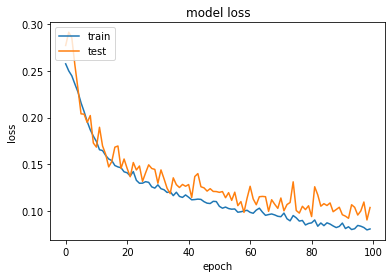

Iteration:2
=== Scores ===
Accuracy: 0.909091
Precision: 0.925926
Recall: 0.884956
F1 score: 0.904977
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       118
           1       0.93      0.88      0.90       113

    accuracy                           0.91       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.91      0.91      0.91       231

=== Confusion Matrix ===
[[110   8]
 [ 13 100]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_164 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_525 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1868/1868 [==============================] - 1s 499us/step - loss: 0.1097 - accuracy: 0.8539 - val_loss: 0.0947 - val_accuracy: 0.8750
Epoch 42/100
1868/1868 [==============================] - 1s 491us/step - loss: 0.1077 - accuracy: 0.8581 - val_loss: 0.0870 - val_accuracy: 0.8846
Epoch 43/100
1868/1868 [==============================] - 1s 484us/step - loss: 0.1034 - accuracy: 0.8683 - val_loss: 0.0927 - val_accuracy: 0.8750
Epoch 44/100
1868/1868 [==============================] - 1s 478us/step - loss: 0.1041 - accuracy: 0.8683 - val_loss: 0.0863 - val_accuracy: 0.8894
Epoch 45/100
1868/1868 [==============================] - 1s 480us/step - loss: 0.1022 - accuracy: 0.8731 - val_loss: 0.0918 - val_accuracy: 0.8846
Epoch 46/100
1868/1868 [==============================] - 1s 490us/step - loss: 0.1039 - accuracy: 0.8763 - val_loss: 0.0846 - val_accuracy: 0.8894
Epoch 47/100
1868/1868 [==============================] - 1s 484us/step - loss: 0.1000 - accuracy: 0.8758 - val_

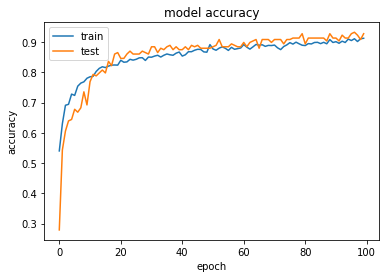

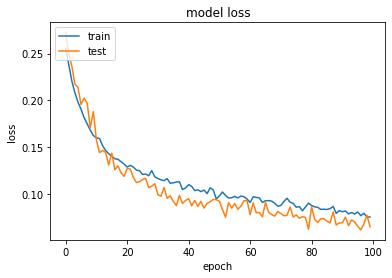

Iteration:3
=== Scores ===
Accuracy: 0.900433
Precision: 0.894737
Recall: 0.902655
F1 score: 0.898678
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       118
           1       0.89      0.90      0.90       113

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[106  12]
 [ 11 102]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_165 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_529 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1868/1868 [==============================] - 1s 425us/step - loss: 0.1224 - accuracy: 0.8415 - val_loss: 0.1012 - val_accuracy: 0.8894
Epoch 42/100
1868/1868 [==============================] - 1s 423us/step - loss: 0.1201 - accuracy: 0.8533 - val_loss: 0.1020 - val_accuracy: 0.8894
Epoch 43/100
1868/1868 [==============================] - 1s 385us/step - loss: 0.1207 - accuracy: 0.8415 - val_loss: 0.1132 - val_accuracy: 0.8654
Epoch 44/100
1868/1868 [==============================] - 1s 443us/step - loss: 0.1226 - accuracy: 0.8399 - val_loss: 0.1155 - val_accuracy: 0.8606
Epoch 45/100
1868/1868 [==============================] - 1s 405us/step - loss: 0.1212 - accuracy: 0.8431 - val_loss: 0.1150 - val_accuracy: 0.8558
Epoch 46/100
1868/1868 [==============================] - 1s 405us/step - loss: 0.1184 - accuracy: 0.8555 - val_loss: 0.1191 - val_accuracy: 0.8413
Epoch 47/100
1868/1868 [==============================] - 1s 444us/step - loss: 0.1188 - accuracy: 0.8517 - val_

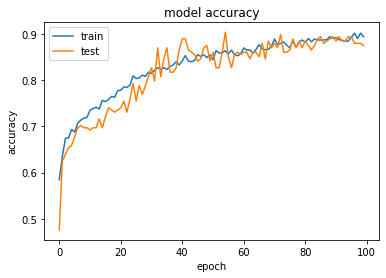

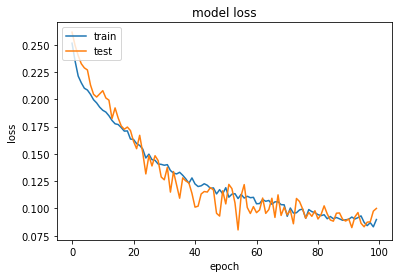

Iteration:4
=== Scores ===
Accuracy: 0.883117
Precision: 0.914286
Recall: 0.842105
F1 score: 0.876712
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.91      0.84      0.88       114

    accuracy                           0.88       231
   macro avg       0.89      0.88      0.88       231
weighted avg       0.89      0.88      0.88       231

=== Confusion Matrix ===
[[108   9]
 [ 18  96]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_166 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_533 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1868/1868 [==============================] - 1s 397us/step - loss: 0.1162 - accuracy: 0.8517 - val_loss: 0.1153 - val_accuracy: 0.8413
Epoch 42/100
1868/1868 [==============================] - 1s 398us/step - loss: 0.1166 - accuracy: 0.8474 - val_loss: 0.1152 - val_accuracy: 0.8462
Epoch 43/100
1868/1868 [==============================] - 1s 403us/step - loss: 0.1163 - accuracy: 0.8549 - val_loss: 0.1033 - val_accuracy: 0.8654
Epoch 44/100
1868/1868 [==============================] - 1s 400us/step - loss: 0.1121 - accuracy: 0.8592 - val_loss: 0.1210 - val_accuracy: 0.8413
Epoch 45/100
1868/1868 [==============================] - 1s 402us/step - loss: 0.1125 - accuracy: 0.8539 - val_loss: 0.1145 - val_accuracy: 0.8462
Epoch 46/100
1868/1868 [==============================] - 1s 400us/step - loss: 0.1163 - accuracy: 0.8522 - val_loss: 0.1151 - val_accuracy: 0.8462
Epoch 47/100
1868/1868 [==============================] - 1s 394us/step - loss: 0.1136 - accuracy: 0.8597 - val_

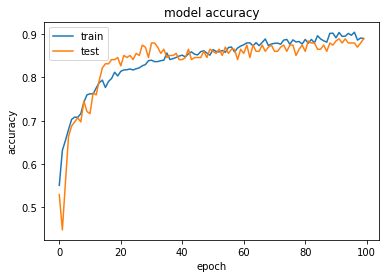

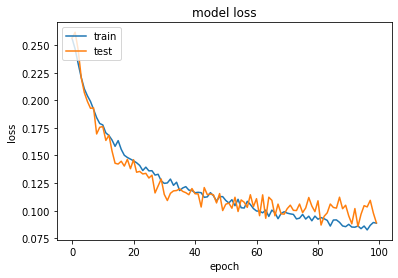

Iteration:5
=== Scores ===
Accuracy: 0.883117
Precision: 0.871795
Recall: 0.894737
F1 score: 0.883117
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.87      0.89      0.88       114

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

=== Confusion Matrix ===
[[102  15]
 [ 12 102]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_167 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_537 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1868/1868 [==============================] - 1s 444us/step - loss: 0.1102 - accuracy: 0.8549 - val_loss: 0.1132 - val_accuracy: 0.8558
Epoch 42/100
1868/1868 [==============================] - 1s 442us/step - loss: 0.1136 - accuracy: 0.8533 - val_loss: 0.1009 - val_accuracy: 0.8798
Epoch 43/100
1868/1868 [==============================] - 1s 442us/step - loss: 0.1062 - accuracy: 0.8597 - val_loss: 0.1091 - val_accuracy: 0.8606
Epoch 44/100
1868/1868 [==============================] - 1s 440us/step - loss: 0.1052 - accuracy: 0.8672 - val_loss: 0.1122 - val_accuracy: 0.8462
Epoch 45/100
1868/1868 [==============================] - 1s 442us/step - loss: 0.1082 - accuracy: 0.8597 - val_loss: 0.1062 - val_accuracy: 0.8702
Epoch 46/100
1868/1868 [==============================] - 1s 441us/step - loss: 0.1065 - accuracy: 0.8656 - val_loss: 0.1102 - val_accuracy: 0.8510
Epoch 47/100
1868/1868 [==============================] - 1s 447us/step - loss: 0.1086 - accuracy: 0.8635 - val_

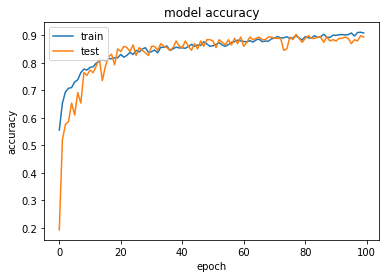

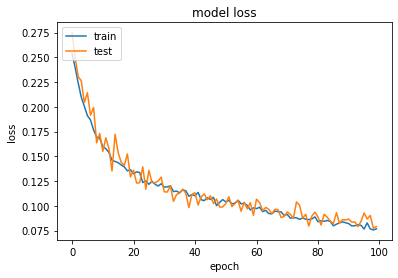

Iteration:6
=== Scores ===
Accuracy: 0.917749
Precision: 0.880000
Recall: 0.964912
F1 score: 0.920502
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       117
           1       0.88      0.96      0.92       114

    accuracy                           0.92       231
   macro avg       0.92      0.92      0.92       231
weighted avg       0.92      0.92      0.92       231

=== Confusion Matrix ===
[[102  15]
 [  4 110]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_168 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_541 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1868/1868 [==============================] - 1s 442us/step - loss: 0.1133 - accuracy: 0.8549 - val_loss: 0.1000 - val_accuracy: 0.8894
Epoch 42/100
1868/1868 [==============================] - 1s 446us/step - loss: 0.1089 - accuracy: 0.8592 - val_loss: 0.0961 - val_accuracy: 0.8894
Epoch 43/100
1868/1868 [==============================] - 1s 437us/step - loss: 0.1086 - accuracy: 0.8667 - val_loss: 0.0959 - val_accuracy: 0.8894
Epoch 44/100
1868/1868 [==============================] - 1s 426us/step - loss: 0.1105 - accuracy: 0.8608 - val_loss: 0.1072 - val_accuracy: 0.8798
Epoch 45/100
1868/1868 [==============================] - 1s 429us/step - loss: 0.1064 - accuracy: 0.8630 - val_loss: 0.0947 - val_accuracy: 0.8942
Epoch 46/100
1868/1868 [==============================] - 1s 435us/step - loss: 0.1085 - accuracy: 0.8678 - val_loss: 0.1076 - val_accuracy: 0.8798
Epoch 47/100
1868/1868 [==============================] - 1s 427us/step - loss: 0.1064 - accuracy: 0.8694 - val_

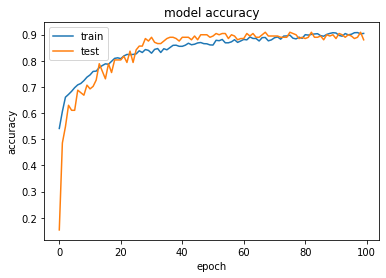

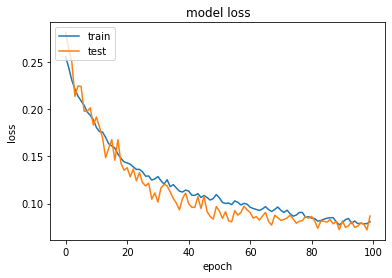

Iteration:7
=== Scores ===
Accuracy: 0.913420
Precision: 0.919643
Recall: 0.903509
F1 score: 0.911504
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       117
           1       0.92      0.90      0.91       114

    accuracy                           0.91       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.91      0.91      0.91       231

=== Confusion Matrix ===
[[108   9]
 [ 11 103]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_169 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_545 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1869/1869 [==============================] - 1s 460us/step - loss: 0.0980 - accuracy: 0.8818 - val_loss: 0.0961 - val_accuracy: 0.8750
Epoch 42/100
1869/1869 [==============================] - 1s 452us/step - loss: 0.0996 - accuracy: 0.8775 - val_loss: 0.0925 - val_accuracy: 0.8846
Epoch 43/100
1869/1869 [==============================] - 1s 446us/step - loss: 0.0964 - accuracy: 0.8791 - val_loss: 0.1068 - val_accuracy: 0.8558
Epoch 44/100
1869/1869 [==============================] - 1s 445us/step - loss: 0.0979 - accuracy: 0.8764 - val_loss: 0.0955 - val_accuracy: 0.8798
Epoch 45/100
1869/1869 [==============================] - 1s 443us/step - loss: 0.0972 - accuracy: 0.8866 - val_loss: 0.1049 - val_accuracy: 0.8510
Epoch 46/100
1869/1869 [==============================] - 1s 448us/step - loss: 0.0958 - accuracy: 0.8769 - val_loss: 0.0913 - val_accuracy: 0.8846
Epoch 47/100
1869/1869 [==============================] - 1s 445us/step - loss: 0.0934 - accuracy: 0.8823 - val_

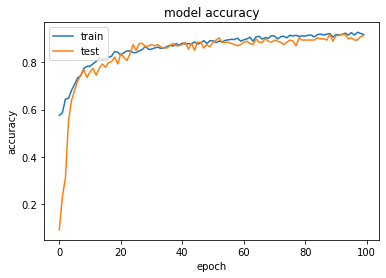

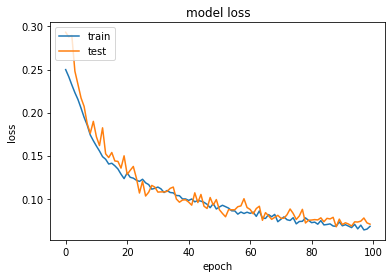

Iteration:8
=== Scores ===
Accuracy: 0.917391
Precision: 0.912281
Recall: 0.920354
F1 score: 0.916300
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       117
           1       0.91      0.92      0.92       113

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230

=== Confusion Matrix ===
[[107  10]
 [  9 104]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_170 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_549 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1869/1869 [==============================] - 1s 451us/step - loss: 0.1054 - accuracy: 0.8646 - val_loss: 0.0847 - val_accuracy: 0.9087
Epoch 42/100
1869/1869 [==============================] - 1s 450us/step - loss: 0.0995 - accuracy: 0.8759 - val_loss: 0.0917 - val_accuracy: 0.8894
Epoch 43/100
1869/1869 [==============================] - 1s 449us/step - loss: 0.1030 - accuracy: 0.8743 - val_loss: 0.0877 - val_accuracy: 0.8990
Epoch 44/100
1869/1869 [==============================] - 1s 454us/step - loss: 0.1001 - accuracy: 0.8775 - val_loss: 0.0860 - val_accuracy: 0.9038
Epoch 45/100
1869/1869 [==============================] - 1s 454us/step - loss: 0.0997 - accuracy: 0.8780 - val_loss: 0.0864 - val_accuracy: 0.9038
Epoch 46/100
1869/1869 [==============================] - 1s 447us/step - loss: 0.0965 - accuracy: 0.8791 - val_loss: 0.0788 - val_accuracy: 0.9087
Epoch 47/100
1869/1869 [==============================] - 1s 460us/step - loss: 0.1008 - accuracy: 0.8727 - val_

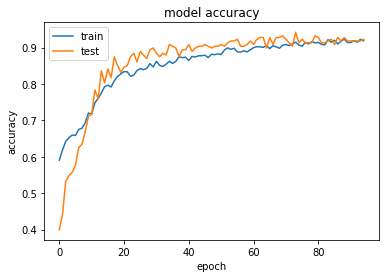

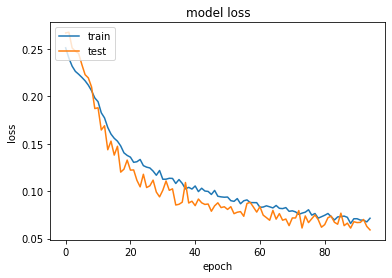

Iteration:9
=== Scores ===
Accuracy: 0.943478
Precision: 0.971698
Recall: 0.911504
F1 score: 0.940639
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       117
           1       0.97      0.91      0.94       113

    accuracy                           0.94       230
   macro avg       0.95      0.94      0.94       230
weighted avg       0.95      0.94      0.94       230

=== Confusion Matrix ===
[[114   3]
 [ 10 103]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_171 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_553 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 41/100
1869/1869 [==============================] - 1s 477us/step - loss: 0.1052 - accuracy: 0.8743 - val_loss: 0.0951 - val_accuracy: 0.9135
Epoch 42/100
1869/1869 [==============================] - 1s 481us/step - loss: 0.1030 - accuracy: 0.8705 - val_loss: 0.0990 - val_accuracy: 0.8942
Epoch 43/100
1869/1869 [==============================] - 1s 479us/step - loss: 0.1069 - accuracy: 0.8678 - val_loss: 0.0998 - val_accuracy: 0.8894
Epoch 44/100
1869/1869 [==============================] - 1s 479us/step - loss: 0.1052 - accuracy: 0.8694 - val_loss: 0.0907 - val_accuracy: 0.9135
Epoch 45/100
1869/1869 [==============================] - 1s 479us/step - loss: 0.1070 - accuracy: 0.8689 - val_loss: 0.0925 - val_accuracy: 0.9038
Epoch 46/100
1869/1869 [==============================] - 1s 477us/step - loss: 0.1004 - accuracy: 0.8775 - val_loss: 0.0988 - val_accuracy: 0.8894
Epoch 47/100
1869/1869 [==============================] - 1s 479us/step - loss: 0.1022 - accuracy: 0.8759 - val_

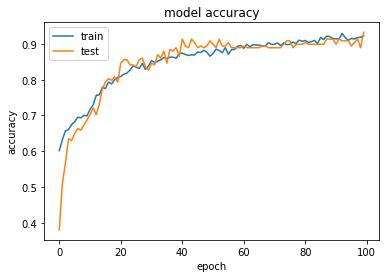

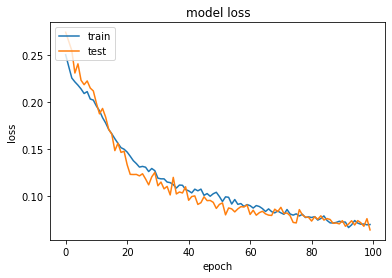

Iteration:10
=== Scores ===
Accuracy: 0.895652
Precision: 0.900901
Recall: 0.884956
F1 score: 0.892857
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       117
           1       0.90      0.88      0.89       113

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230

=== Confusion Matrix ===
[[106  11]
 [ 13 100]]




Averages
Accuracy: 0.9068210050818747
Precision: 0.9086918101030509
Recall: 0.902119236143456
F1 measure: 0.9048796262040228
Confusion Matrix

[[106.9  10.4]
 [ 11.1 102.3]]


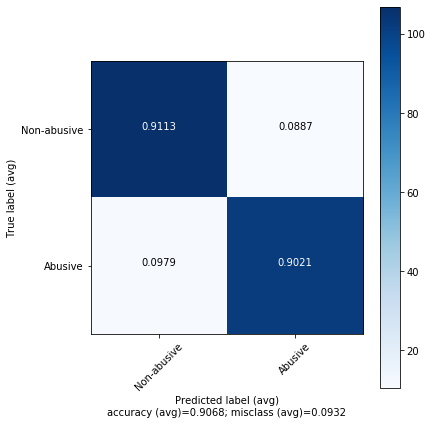

In [174]:
reset_seeds()
cnn_mp = CNN1D_MaxPooling(xTrain, yTrain, target_names, class_names, 'CNN1D (Glove) ',  _epochs = 100, _verbose=2, graph = True, _optimizer = Adam(lr=0.0001))

In [64]:
from keras_self_attention import SeqSelfAttention
def CNN1D_ATTENTION(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='mean_squared_error', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.001), _bias_regularizer=l2(0.0001)):
    print("--------------- CNN1D ---------------")  

    n_classes = 1
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential()

        model.add(Conv1D(4, kernel_size=1, strides= 1, padding='same',activation='tanh', input_shape=_input_shape,kernel_regularizer= _kernel_regularizer, bias_regularizer= _bias_regularizer))
        model.add(Dropout(0.2))
        
        model.add(SeqSelfAttention(attention_activation='sigmoid'))

        model.add(Dense(16 ,activation='tanh'))
        model.add(Dropout(0.2))

        model.add(Dense(32 ,activation='relu'))
        model.add(Dropout(0.2))
        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='sigmoid'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.06, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred )
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- CNN1D ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_172 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_557 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
seq_self_attention_36 (SeqSe (None, 24, 4)             321       
_________________________________________________________________
dense_516 (Dense)            (None, 24, 16)            80        
_________________________________________________________________
dropout_558 (Dropout)        (None, 24, 16)            0         
_________________________________________________________________
dense_517 (Dense)            (None, 24, 32)            

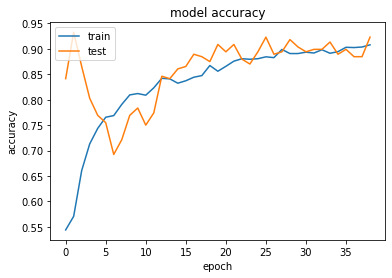

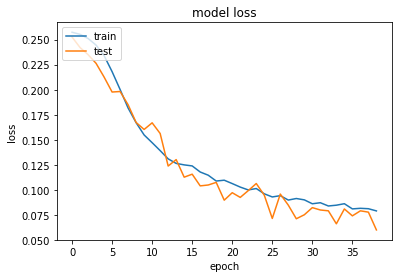

Iteration:1
=== Scores ===
Accuracy: 0.909091
Precision: 0.883333
Recall: 0.938053
F1 score: 0.909871
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       118
           1       0.88      0.94      0.91       113

    accuracy                           0.91       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.91      0.91      0.91       231

=== Confusion Matrix ===
[[104  14]
 [  7 106]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_173 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_560 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 42/100
1868/1868 [==============================] - 1s 682us/step - loss: 0.0619 - accuracy: 0.9299 - val_loss: 0.0854 - val_accuracy: 0.8750
Epoch 43/100
1868/1868 [==============================] - 1s 680us/step - loss: 0.0634 - accuracy: 0.9272 - val_loss: 0.0617 - val_accuracy: 0.9183
Epoch 44/100
1868/1868 [==============================] - 1s 673us/step - loss: 0.0665 - accuracy: 0.9176 - val_loss: 0.0687 - val_accuracy: 0.9087
Epoch 45/100
1868/1868 [==============================] - 1s 675us/step - loss: 0.0668 - accuracy: 0.9208 - val_loss: 0.0823 - val_accuracy: 0.8798
Epoch 46/100
1868/1868 [==============================] - 1s 676us/step - loss: 0.0641 - accuracy: 0.9229 - val_loss: 0.0843 - val_accuracy: 0.8798
Epoch 47/100
1868/1868 [==============================] - 1s 675us/step - loss: 0.0630 - accuracy: 0.9299 - val_loss: 0.0686 - val_accuracy: 0.9038
Epoch 48/100
1868/1868 [==============================] - 1s 684us/step - loss: 0.0605 - accuracy: 0.9293 - val_

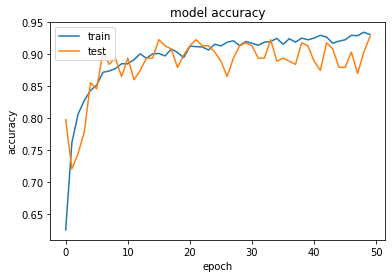

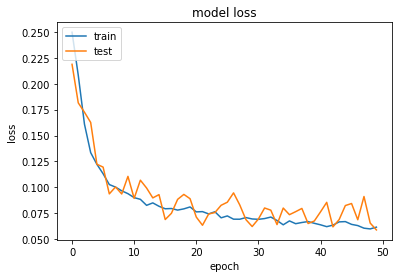

Iteration:2
=== Scores ===
Accuracy: 0.948052
Precision: 0.954955
Recall: 0.938053
F1 score: 0.946429
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       118
           1       0.95      0.94      0.95       113

    accuracy                           0.95       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231

=== Confusion Matrix ===
[[113   5]
 [  7 106]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_174 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_563 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

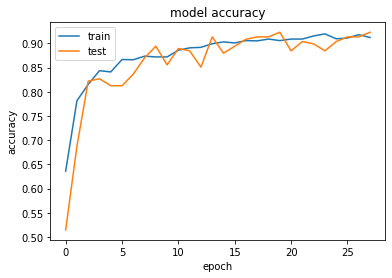

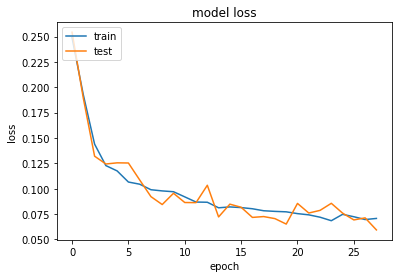

Iteration:3
=== Scores ===
Accuracy: 0.891775
Precision: 0.885965
Recall: 0.893805
F1 score: 0.889868
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       118
           1       0.89      0.89      0.89       113

    accuracy                           0.89       231
   macro avg       0.89      0.89      0.89       231
weighted avg       0.89      0.89      0.89       231

=== Confusion Matrix ===
[[105  13]
 [ 12 101]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_175 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_566 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 42/100
1868/1868 [==============================] - 1s 654us/step - loss: 0.0665 - accuracy: 0.9160 - val_loss: 0.0653 - val_accuracy: 0.9231
Epoch 43/100
1868/1868 [==============================] - 1s 660us/step - loss: 0.0634 - accuracy: 0.9256 - val_loss: 0.0741 - val_accuracy: 0.9183
Epoch 44/100
1868/1868 [==============================] - 1s 655us/step - loss: 0.0613 - accuracy: 0.9283 - val_loss: 0.0683 - val_accuracy: 0.9231
Epoch 45/100
1868/1868 [==============================] - 1s 646us/step - loss: 0.0650 - accuracy: 0.9240 - val_loss: 0.0644 - val_accuracy: 0.9231
Epoch 46/100
1868/1868 [==============================] - 1s 635us/step - loss: 0.0658 - accuracy: 0.9202 - val_loss: 0.0814 - val_accuracy: 0.9087
Epoch 47/100
1868/1868 [==============================] - 1s 635us/step - loss: 0.0668 - accuracy: 0.9218 - val_loss: 0.0647 - val_accuracy: 0.9231
Epoch 48/100
1868/1868 [==============================] - 1s 636us/step - loss: 0.0626 - accuracy: 0.9315 - val_

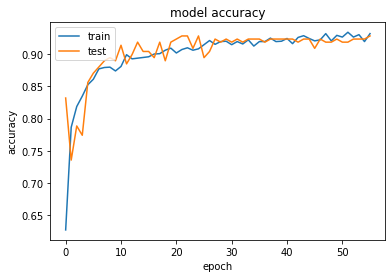

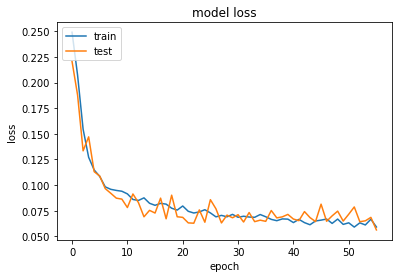

Iteration:4
=== Scores ===
Accuracy: 0.917749
Precision: 0.935780
Recall: 0.894737
F1 score: 0.914798
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       117
           1       0.94      0.89      0.91       114

    accuracy                           0.92       231
   macro avg       0.92      0.92      0.92       231
weighted avg       0.92      0.92      0.92       231

=== Confusion Matrix ===
[[110   7]
 [ 12 102]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_177"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_176 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_569 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

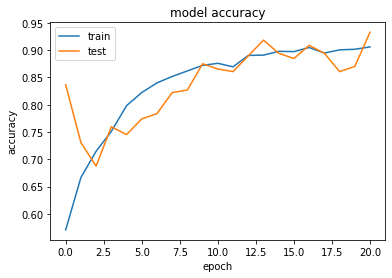

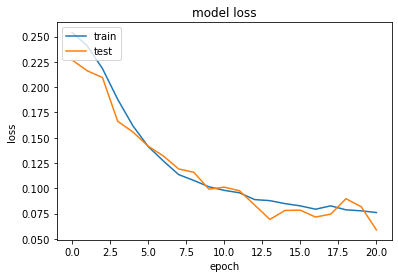

Iteration:5
=== Scores ===
Accuracy: 0.878788
Precision: 0.870690
Recall: 0.885965
F1 score: 0.878261
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.87      0.89      0.88       114

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

=== Confusion Matrix ===
[[102  15]
 [ 13 101]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_177 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_572 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


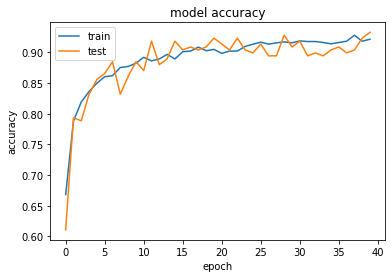

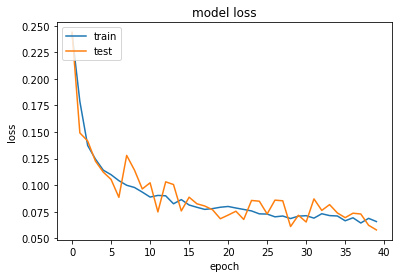

Iteration:6
=== Scores ===
Accuracy: 0.935065
Precision: 0.909091
Recall: 0.964912
F1 score: 0.936170
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       117
           1       0.91      0.96      0.94       114

    accuracy                           0.94       231
   macro avg       0.94      0.94      0.94       231
weighted avg       0.94      0.94      0.94       231

=== Confusion Matrix ===
[[106  11]
 [  4 110]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_178 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_575 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 42/100
1868/1868 [==============================] - 1s 487us/step - loss: 0.0670 - accuracy: 0.9218 - val_loss: 0.0730 - val_accuracy: 0.9038
Epoch 43/100
1868/1868 [==============================] - 1s 493us/step - loss: 0.0652 - accuracy: 0.9160 - val_loss: 0.0884 - val_accuracy: 0.8846
Epoch 44/100
1868/1868 [==============================] - 1s 463us/step - loss: 0.0668 - accuracy: 0.9202 - val_loss: 0.0810 - val_accuracy: 0.8942
Epoch 45/100
1868/1868 [==============================] - 1s 467us/step - loss: 0.0637 - accuracy: 0.9267 - val_loss: 0.0716 - val_accuracy: 0.9038
Epoch 46/100
1868/1868 [==============================] - 1s 469us/step - loss: 0.0638 - accuracy: 0.9224 - val_loss: 0.0736 - val_accuracy: 0.8990
Epoch 47/100
1868/1868 [==============================] - 1s 456us/step - loss: 0.0645 - accuracy: 0.9272 - val_loss: 0.0692 - val_accuracy: 0.9135
Epoch 48/100
1868/1868 [==============================] - 1s 489us/step - loss: 0.0658 - accuracy: 0.9192 - val_

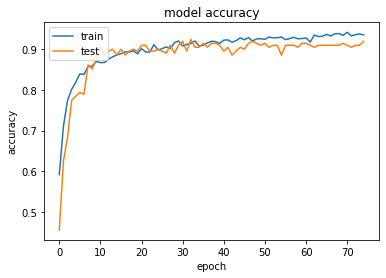

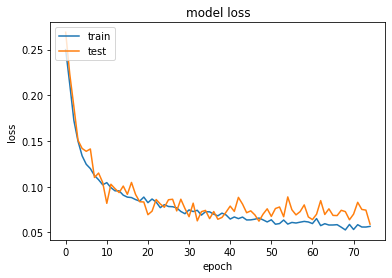

Iteration:7
=== Scores ===
Accuracy: 0.935065
Precision: 0.915966
Recall: 0.956140
F1 score: 0.935622
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       117
           1       0.92      0.96      0.94       114

    accuracy                           0.94       231
   macro avg       0.94      0.94      0.94       231
weighted avg       0.94      0.94      0.94       231

=== Confusion Matrix ===
[[107  10]
 [  5 109]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_179 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_578 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 42/100
1869/1869 [==============================] - 1s 449us/step - loss: 0.0679 - accuracy: 0.9213 - val_loss: 0.0862 - val_accuracy: 0.8894
Epoch 43/100
1869/1869 [==============================] - 1s 464us/step - loss: 0.0656 - accuracy: 0.9219 - val_loss: 0.0746 - val_accuracy: 0.9087
Epoch 44/100
1869/1869 [==============================] - 1s 454us/step - loss: 0.0650 - accuracy: 0.9267 - val_loss: 0.0780 - val_accuracy: 0.9038
Epoch 45/100
1869/1869 [==============================] - 1s 459us/step - loss: 0.0669 - accuracy: 0.9165 - val_loss: 0.0768 - val_accuracy: 0.9038
Epoch 46/100
1869/1869 [==============================] - 1s 452us/step - loss: 0.0686 - accuracy: 0.9213 - val_loss: 0.0814 - val_accuracy: 0.8990
Epoch 47/100
1869/1869 [==============================] - 1s 446us/step - loss: 0.0700 - accuracy: 0.9171 - val_loss: 0.0721 - val_accuracy: 0.9183
Epoch 48/100
1869/1869 [==============================] - 1s 462us/step - loss: 0.0677 - accuracy: 0.9197 - val_

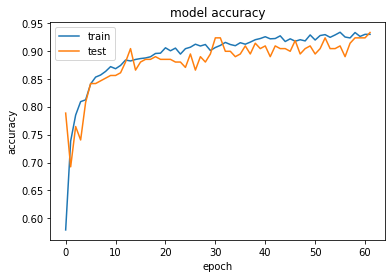

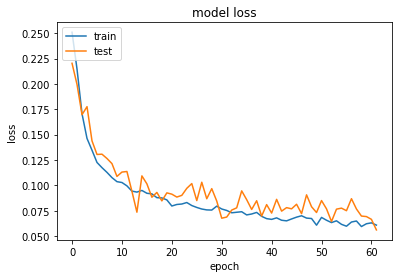

Iteration:8
=== Scores ===
Accuracy: 0.921739
Precision: 0.892562
Recall: 0.955752
F1 score: 0.923077
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       117
           1       0.89      0.96      0.92       113

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230

=== Confusion Matrix ===
[[104  13]
 [  5 108]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_180 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_581 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

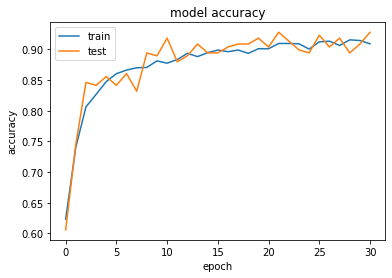

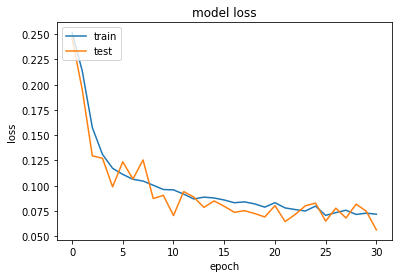

Iteration:9
=== Scores ===
Accuracy: 0.930435
Precision: 0.914530
Recall: 0.946903
F1 score: 0.930435
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       117
           1       0.91      0.95      0.93       113

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.93      0.93      0.93       230

=== Confusion Matrix ===
[[107  10]
 [  6 107]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_181 (Conv1D)          (None, 24, 4)             1204      
_________________________________________________________________
dropout_584 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

Epoch 42/100
1869/1869 [==============================] - 1s 473us/step - loss: 0.0672 - accuracy: 0.9224 - val_loss: 0.0784 - val_accuracy: 0.9038
Epoch 43/100
1869/1869 [==============================] - 1s 535us/step - loss: 0.0652 - accuracy: 0.9203 - val_loss: 0.0635 - val_accuracy: 0.9135
Epoch 44/100
1869/1869 [==============================] - 1s 455us/step - loss: 0.0623 - accuracy: 0.9262 - val_loss: 0.0681 - val_accuracy: 0.9087
Epoch 45/100
1869/1869 [==============================] - 1s 467us/step - loss: 0.0620 - accuracy: 0.9304 - val_loss: 0.0715 - val_accuracy: 0.9038
Epoch 46/100
1869/1869 [==============================] - 1s 459us/step - loss: 0.0614 - accuracy: 0.9288 - val_loss: 0.0815 - val_accuracy: 0.9038
Epoch 47/100
1869/1869 [==============================] - 1s 457us/step - loss: 0.0609 - accuracy: 0.9278 - val_loss: 0.0834 - val_accuracy: 0.8990
Epoch 48/100
1869/1869 [==============================] - 1s 454us/step - loss: 0.0612 - accuracy: 0.9288 - val_

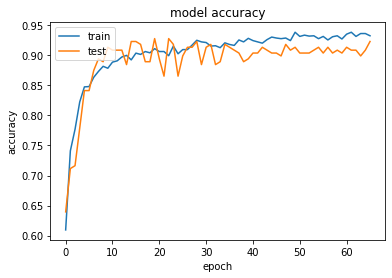

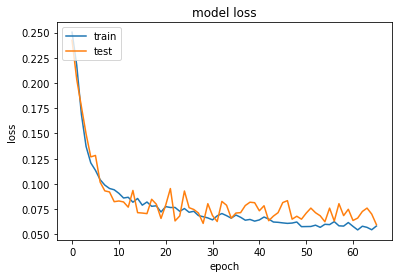

Iteration:10
=== Scores ===
Accuracy: 0.908696
Precision: 0.933962
Recall: 0.876106
F1 score: 0.904110
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       117
           1       0.93      0.88      0.90       113

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230

=== Confusion Matrix ===
[[110   7]
 [ 14  99]]




Averages
Accuracy: 0.9176453980801806
Precision: 0.9096834130052629
Recall: 0.9250426952336595
F1 measure: 0.916864055840594
Confusion Matrix

[[106.8  10.5]
 [  8.5 104.9]]


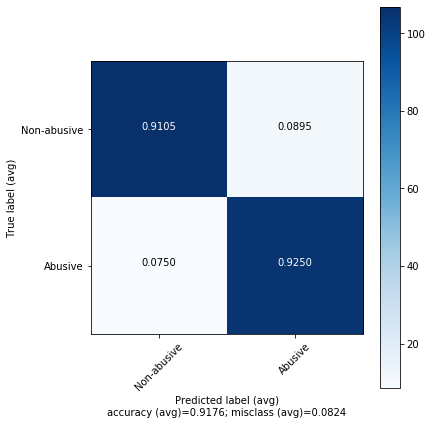

In [176]:
reset_seeds()
cnn_att = CNN1D_ATTENTION(xTrain, yTrain, target_names, class_names, 'CNN1D (Glove) ',  _epochs = 100, _verbose=2, graph = True, _optimizer = Adam(lr=0.0001))

In [198]:
from keras.layers import LSTM, Dense
import numpy as np
def LSTM_Model(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='mean_squared_error', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.01), _bias_regularizer=l2(0.0001)):
    print("--------------- LSTM ---------------")  

    n_classes = 1
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential() 
        model.add (LSTM(4, return_sequences=True, activation="tanh", input_shape=_input_shape))
        model.add(Dropout(0.2))
        
        model.add(Dense(8 ,activation='relu'))
        model.add(Dropout(0.2))
        

        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='sigmoid'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.09, verbose=1),
                      #EarlyStopping(monitor='val_loss', patience=2, verbose=0)
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred )
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- LSTM ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_710 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
dense_659 (Dense)            (None, 24, 8)             40        
_________________________________________________________________
dropout_711 (Dropout)        (None, 24, 8)             0         
_________________________________________________________________
flatten_234 (Flatten)        (None, 192)               0         
_________________________________________________________________
dense_660 (Dense)            (None, 1)                 1

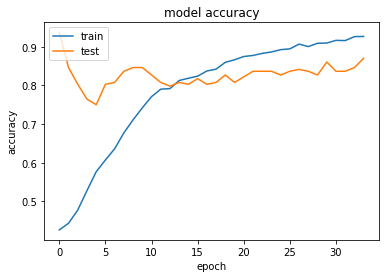

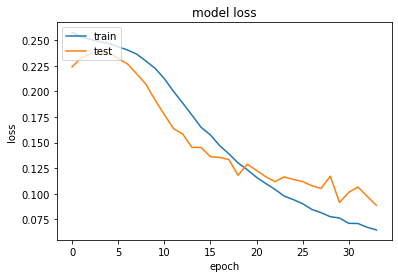

Iteration:1
=== Scores ===
Accuracy: 0.870130
Precision: 0.848739
Recall: 0.893805
F1 score: 0.870690
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       118
           1       0.85      0.89      0.87       113

    accuracy                           0.87       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.87      0.87      0.87       231

=== Confusion Matrix ===
[[100  18]
 [ 12 101]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_712 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

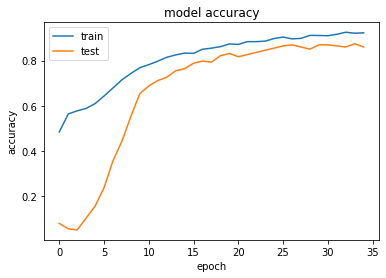

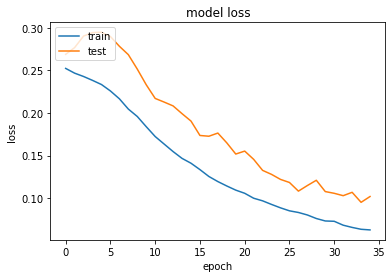

Iteration:2
=== Scores ===
Accuracy: 0.904762
Precision: 0.902655
Recall: 0.902655
F1 score: 0.902655
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       118
           1       0.90      0.90      0.90       113

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[107  11]
 [ 11 102]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_236"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_714 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

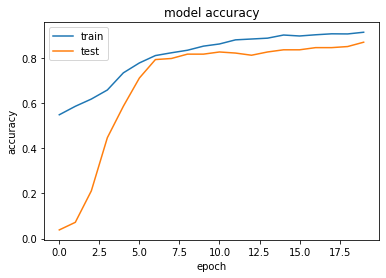

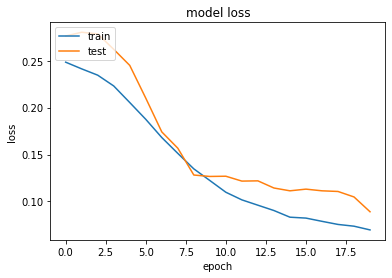

Iteration:3
=== Scores ===
Accuracy: 0.874459
Precision: 0.888889
Recall: 0.849558
F1 score: 0.868778
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       118
           1       0.89      0.85      0.87       113

    accuracy                           0.87       231
   macro avg       0.88      0.87      0.87       231
weighted avg       0.88      0.87      0.87       231

=== Confusion Matrix ===
[[106  12]
 [ 17  96]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_716 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

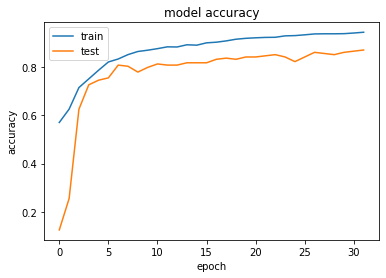

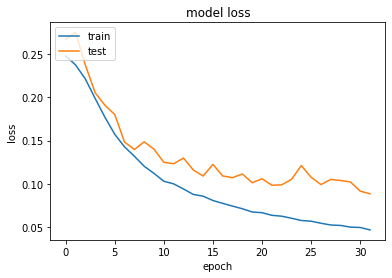

Iteration:4
=== Scores ===
Accuracy: 0.900433
Precision: 0.917431
Recall: 0.877193
F1 score: 0.896861
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       117
           1       0.92      0.88      0.90       114

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[108   9]
 [ 14 100]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_718 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

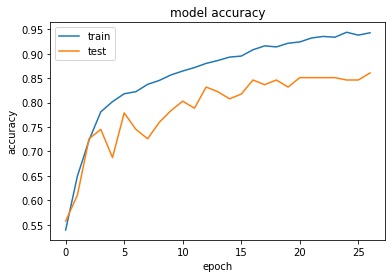

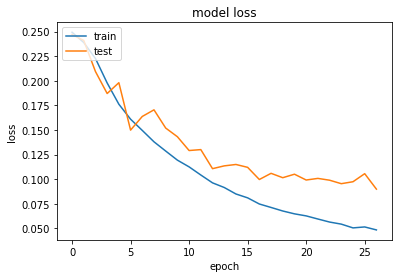

Iteration:5
=== Scores ===
Accuracy: 0.865801
Precision: 0.873874
Recall: 0.850877
F1 score: 0.862222
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.87      0.85      0.86       114

    accuracy                           0.87       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.87      0.87      0.87       231

=== Confusion Matrix ===
[[103  14]
 [ 17  97]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_720 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

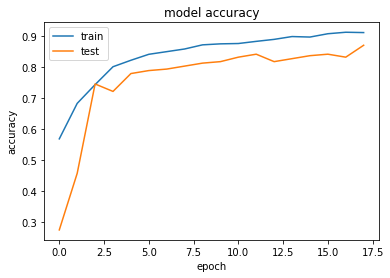

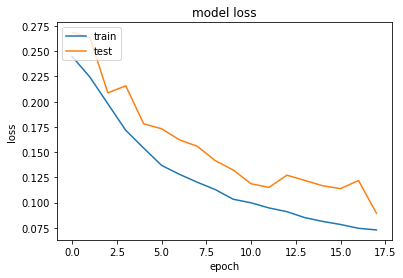

Iteration:6
=== Scores ===
Accuracy: 0.852814
Precision: 0.822581
Recall: 0.894737
F1 score: 0.857143
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       117
           1       0.82      0.89      0.86       114

    accuracy                           0.85       231
   macro avg       0.86      0.85      0.85       231
weighted avg       0.86      0.85      0.85       231

=== Confusion Matrix ===
[[ 95  22]
 [ 12 102]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_722 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

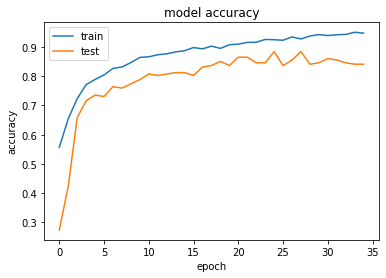

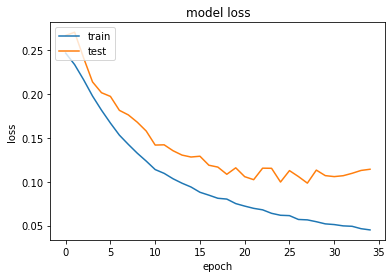

Iteration:7
=== Scores ===
Accuracy: 0.900433
Precision: 0.941748
Recall: 0.850877
F1 score: 0.894009
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       117
           1       0.94      0.85      0.89       114

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[111   6]
 [ 17  97]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_724 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

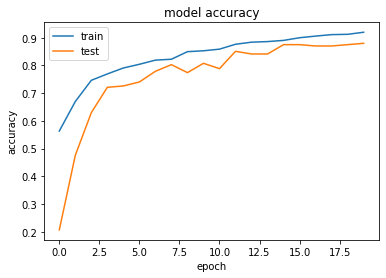

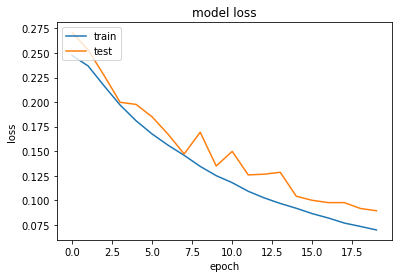

Iteration:8
=== Scores ===
Accuracy: 0.891304
Precision: 0.900000
Recall: 0.876106
F1 score: 0.887892
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       117
           1       0.90      0.88      0.89       113

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

=== Confusion Matrix ===
[[106  11]
 [ 14  99]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_726 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

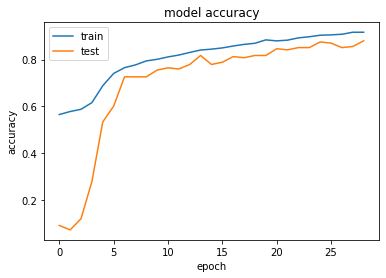

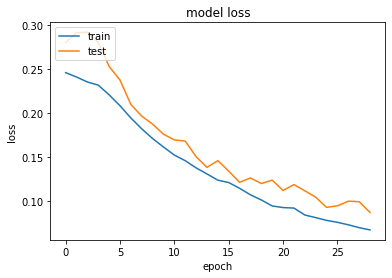

Iteration:9
=== Scores ===
Accuracy: 0.900000
Precision: 0.932692
Recall: 0.858407
F1 score: 0.894009
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       117
           1       0.93      0.86      0.89       113

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230

=== Confusion Matrix ===
[[110   7]
 [ 16  97]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_728 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

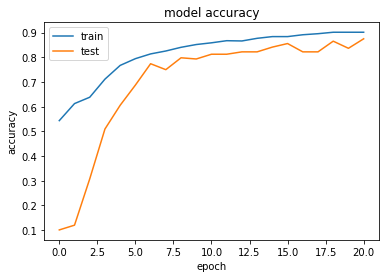

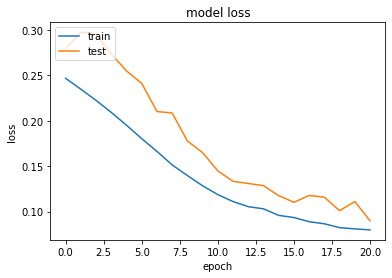

Iteration:10
=== Scores ===
Accuracy: 0.856522
Precision: 0.870370
Recall: 0.831858
F1 score: 0.850679
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       117
           1       0.87      0.83      0.85       113

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230

=== Confusion Matrix ===
[[103  14]
 [ 19  94]]




Averages
Accuracy: 0.8816657255787691
Precision: 0.8898979214517773
Recall: 0.8686073591057288
F1 measure: 0.8784938411777213
Confusion Matrix

[[104.9  12.4]
 [ 14.9  98.5]]


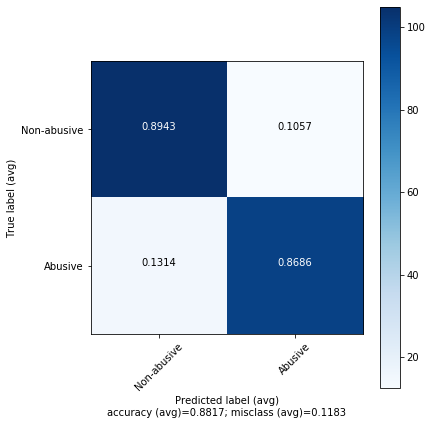

In [199]:
reset_seeds()
lstm = LSTM_Model(xTrain, yTrain, target_names, class_names, 'LSTM (Glove) ',  _epochs = 35, _verbose=2, graph = True, _optimizer = Adam(lr=0.0001))

In [200]:
from keras.layers import LSTM, Dense
import numpy as np
def LSTM_Model_MaxPooling(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='mean_squared_error', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.01), _bias_regularizer=l2(0.0001)):
    print("--------------- LSTM ---------------")  

    n_classes = 1
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential() 
        model.add (LSTM(4, return_sequences=True, activation="tanh", input_shape=_input_shape))
        model.add(Dropout(0.2))
        
        model.add(MaxPooling1D(pool_size=1, strides=1, padding='valid', data_format='channels_last'))
        model.add(Dropout(0.2))
        
        model.add(Dense(8 ,activation='elu'))
        model.add(Dropout(0.2))
        

        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='sigmoid'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.09, verbose=1),
                      #EarlyStopping(monitor='val_loss', patience=2, verbose=0)
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred )
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- LSTM ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_730 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 24, 4)             0         
_________________________________________________________________
dropout_731 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
dense_679 (Dense)            (None, 24, 8)             40        
_________________________________________________________________
dropout_732 (Dropout)        (None, 24, 8)             0

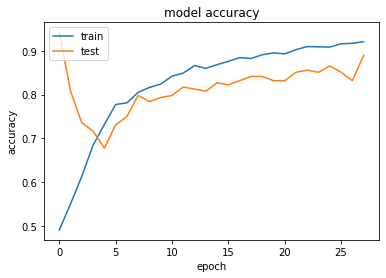

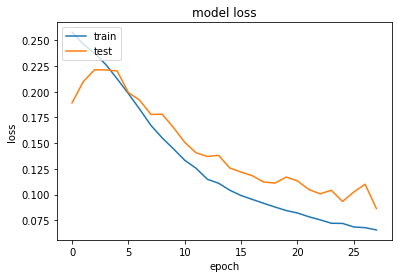

Iteration:1
=== Scores ===
Accuracy: 0.844156
Precision: 0.818182
Recall: 0.876106
F1 score: 0.846154
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       118
           1       0.82      0.88      0.85       113

    accuracy                           0.84       231
   macro avg       0.85      0.84      0.84       231
weighted avg       0.85      0.84      0.84       231

=== Confusion Matrix ===
[[96 22]
 [14 99]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_733 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________
max

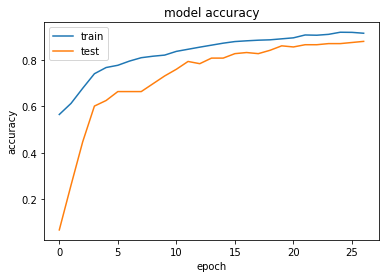

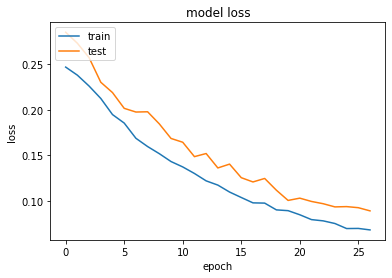

Iteration:2
=== Scores ===
Accuracy: 0.909091
Precision: 0.950980
Recall: 0.858407
F1 score: 0.902326
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       118
           1       0.95      0.86      0.90       113

    accuracy                           0.91       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.91      0.91      0.91       231

=== Confusion Matrix ===
[[113   5]
 [ 16  97]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_736 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

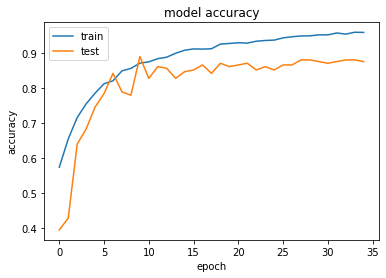

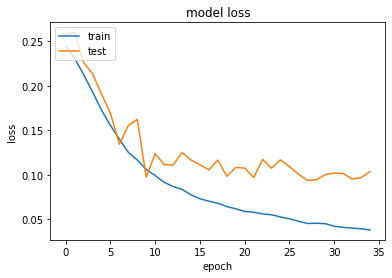

Iteration:3
=== Scores ===
Accuracy: 0.870130
Precision: 0.927835
Recall: 0.796460
F1 score: 0.857143
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       118
           1       0.93      0.80      0.86       113

    accuracy                           0.87       231
   macro avg       0.88      0.87      0.87       231
weighted avg       0.88      0.87      0.87       231

=== Confusion Matrix ===
[[111   7]
 [ 23  90]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_739 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

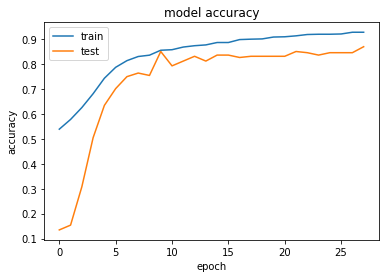

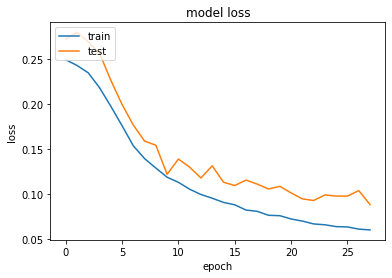

Iteration:4
=== Scores ===
Accuracy: 0.904762
Precision: 0.903509
Recall: 0.903509
F1 score: 0.903509
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       117
           1       0.90      0.90      0.90       114

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[106  11]
 [ 11 103]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_742 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

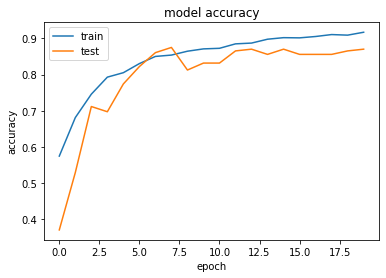

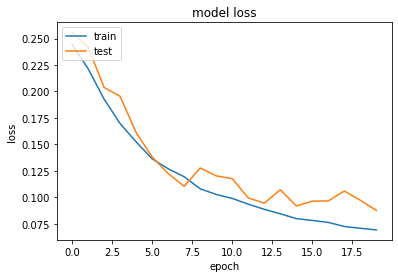

Iteration:5
=== Scores ===
Accuracy: 0.870130
Precision: 0.896226
Recall: 0.833333
F1 score: 0.863636
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       117
           1       0.90      0.83      0.86       114

    accuracy                           0.87       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.87      0.87      0.87       231

=== Confusion Matrix ===
[[106  11]
 [ 19  95]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_745 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

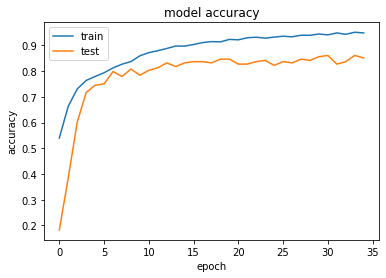

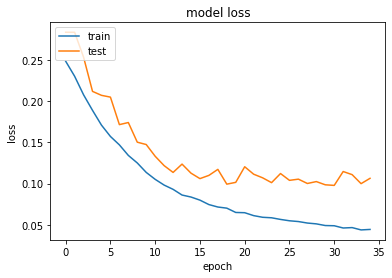

Iteration:6
=== Scores ===
Accuracy: 0.900433
Precision: 0.933333
Recall: 0.859649
F1 score: 0.894977
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       117
           1       0.93      0.86      0.89       114

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[110   7]
 [ 16  98]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_748 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

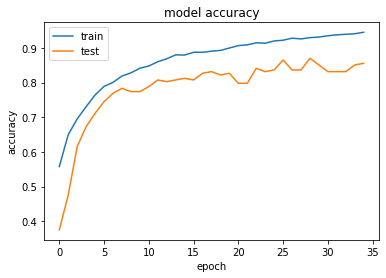

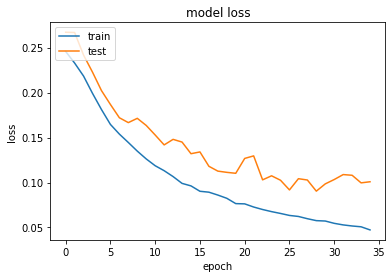

Iteration:7
=== Scores ===
Accuracy: 0.874459
Precision: 0.912621
Recall: 0.824561
F1 score: 0.866359
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       117
           1       0.91      0.82      0.87       114

    accuracy                           0.87       231
   macro avg       0.88      0.87      0.87       231
weighted avg       0.88      0.87      0.87       231

=== Confusion Matrix ===
[[108   9]
 [ 20  94]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_59 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_751 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

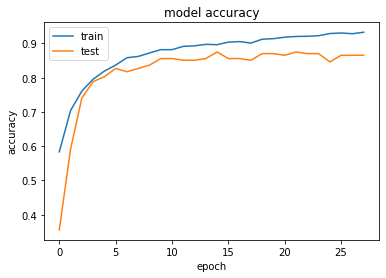

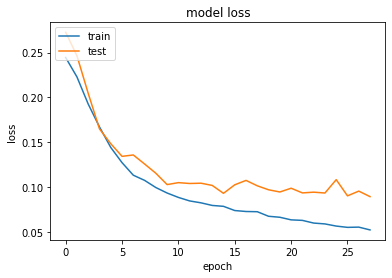

Iteration:8
=== Scores ===
Accuracy: 0.873913
Precision: 0.888889
Recall: 0.849558
F1 score: 0.868778
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       117
           1       0.89      0.85      0.87       113

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

=== Confusion Matrix ===
[[105  12]
 [ 17  96]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_754 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

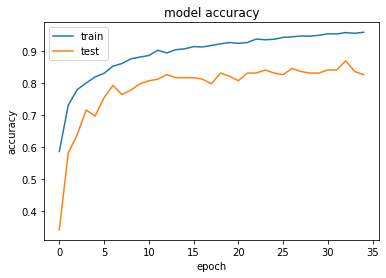

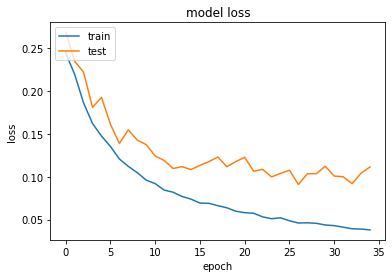

Iteration:9
=== Scores ===
Accuracy: 0.913043
Precision: 0.960396
Recall: 0.858407
F1 score: 0.906542
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       117
           1       0.96      0.86      0.91       113

    accuracy                           0.91       230
   macro avg       0.92      0.91      0.91       230
weighted avg       0.92      0.91      0.91       230

=== Confusion Matrix ===
[[113   4]
 [ 16  97]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_757 (Dropout)        (None, 24, 4)             0         
_________________________________________________________________

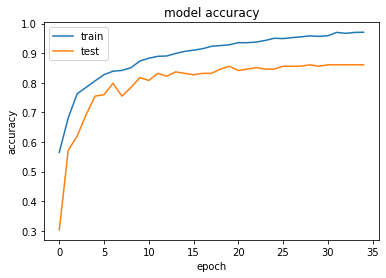

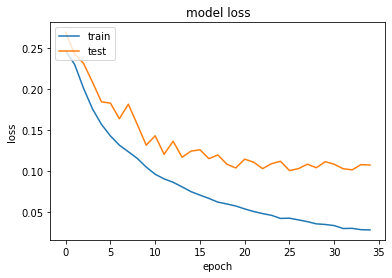

Iteration:10
=== Scores ===
Accuracy: 0.891304
Precision: 0.931373
Recall: 0.840708
F1 score: 0.883721
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       117
           1       0.93      0.84      0.88       113

    accuracy                           0.89       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

=== Confusion Matrix ===
[[110   7]
 [ 18  95]]




Averages
Accuracy: 0.8851421042725391
Precision: 0.9123344618978327
Recall: 0.8500698649278062
F1 measure: 0.8793145303062933
Confusion Matrix

[[107.8   9.5]
 [ 17.   96.4]]


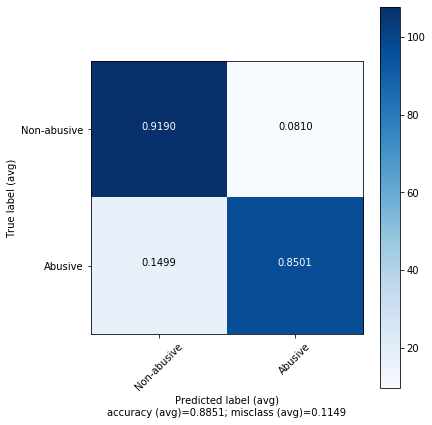

In [201]:
reset_seeds()
lstm_mx = LSTM_Model_MaxPooling(xTrain, yTrain, target_names, class_names, 'LSTM (Glove) ',  _epochs = 35, _verbose=2, graph = True, _optimizer = Adam(lr=0.0001))

In [65]:
from keras.layers import LSTM, Dense
import numpy as np
def LSTM_Model_ATTENTION(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='mean_squared_error', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 2, _verbose = 2, graph = False, _kernel_regularizer=l2(0.01), _bias_regularizer=l2(0.0001)):
    print("--------------- LSTM ---------------")  

    n_classes = 1
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        if X_train.ndim == 2:
            xTrain,xTest,_input_shape = Shape_Reshaper(X_train, X_test)
        else:
            xTrain,xTest,_input_shape = Shape_Reshaper_Vec(X_train, X_test)
        
        
            
        model = Sequential() 
        model.add (LSTM(4, return_sequences=True, activation="tanh", input_shape=_input_shape))
        model.add(Dropout(0.2))
        
        model.add(SeqSelfAttention(attention_activation='sigmoid'))
        
        model.add(Dense(8 ,activation='elu'))
        model.add(Dropout(0.2))
        

        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='sigmoid'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.09, verbose=1),
                      #EarlyStopping(monitor='val_loss', patience=2, verbose=0)
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain.astype('float32'), y_train, epochs=_epochs,validation_split = _validation_split,callbacks=callbacks)
        
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred )
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

RANDOM SEEDS RESET
--------------- LSTM ---------------
(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 4)             0         
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, 24, 4)             321       
_________________________________________________________________
dense_1 (Dense)              (None, 24, 8)             40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 8)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0  

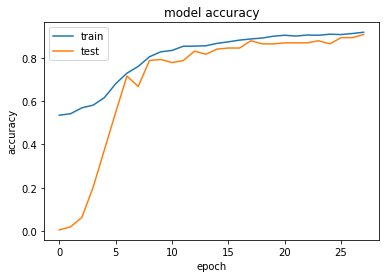

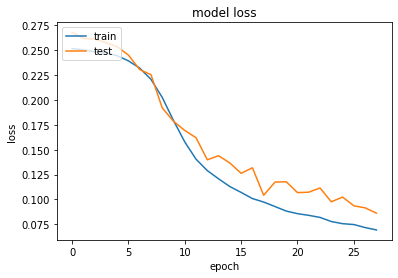

Iteration:1
=== Scores ===
Accuracy: 0.878788
Precision: 0.869565
Recall: 0.884956
F1 score: 0.877193
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       118
           1       0.87      0.88      0.88       113

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

=== Confusion Matrix ===
[[103  15]
 [ 13 100]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 4)             0         
_________________________________________________________________
s

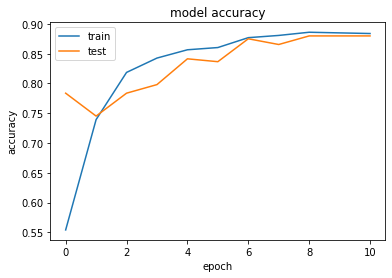

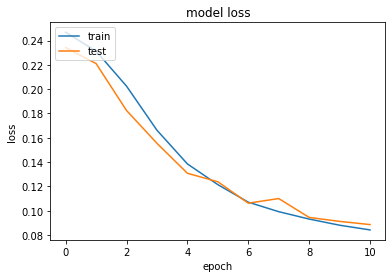

Iteration:2
=== Scores ===
Accuracy: 0.900433
Precision: 0.916667
Recall: 0.876106
F1 score: 0.895928
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.92      0.88      0.90       113

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[109   9]
 [ 14  99]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 4)             0         
_________________________________________________________________
s

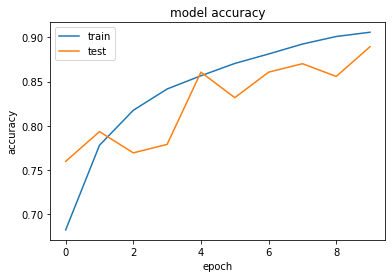

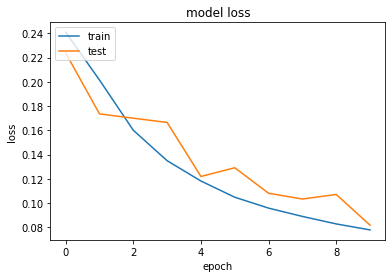

Iteration:3
=== Scores ===
Accuracy: 0.883117
Precision: 0.898148
Recall: 0.858407
F1 score: 0.877828
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       118
           1       0.90      0.86      0.88       113

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

=== Confusion Matrix ===
[[107  11]
 [ 16  97]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 4)             0         
_________________________________________________________________
s

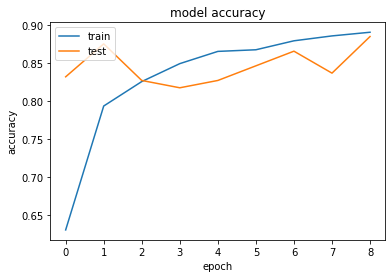

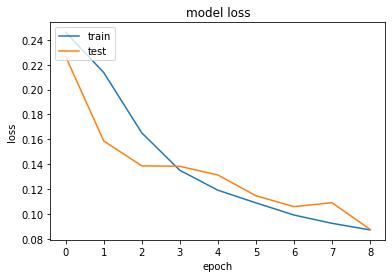

Iteration:4
=== Scores ===
Accuracy: 0.909091
Precision: 0.911504
Recall: 0.903509
F1 score: 0.907489
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       117
           1       0.91      0.90      0.91       114

    accuracy                           0.91       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.91      0.91      0.91       231

=== Confusion Matrix ===
[[107  10]
 [ 11 103]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 4)             0         
_________________________________________________________________
s

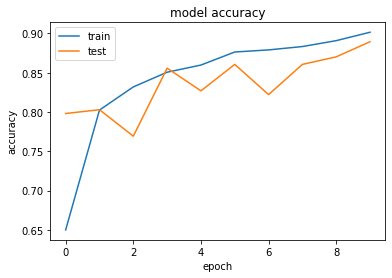

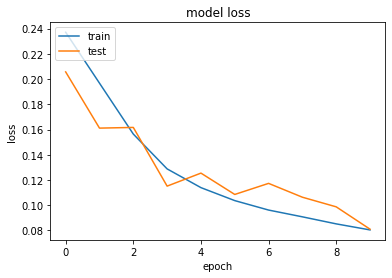

Iteration:5
=== Scores ===
Accuracy: 0.844156
Precision: 0.842105
Recall: 0.842105
F1 score: 0.842105
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.84      0.84      0.84       114

    accuracy                           0.84       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.84      0.84      0.84       231

=== Confusion Matrix ===
[[99 18]
 [18 96]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 4)             0         
_________________________________________________________________
seq_s

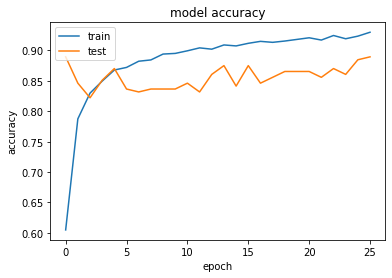

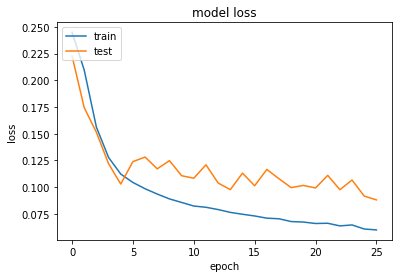

Iteration:6
=== Scores ===
Accuracy: 0.900433
Precision: 0.882353
Recall: 0.921053
F1 score: 0.901288
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       117
           1       0.88      0.92      0.90       114

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231

=== Confusion Matrix ===
[[103  14]
 [  9 105]]


(2076, 24, 300)
(231, 24, 300)
(2076, 24, 300)
(231, 24, 300)
(24, 300)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 4)             0         
_________________________________________________________________
s

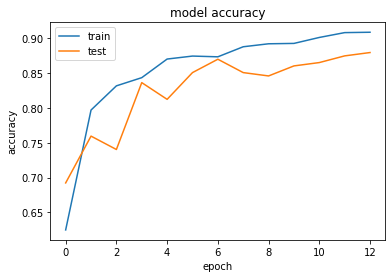

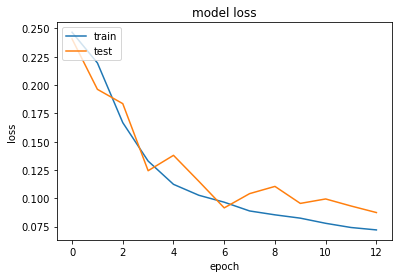

Iteration:7
=== Scores ===
Accuracy: 0.878788
Precision: 0.858333
Recall: 0.903509
F1 score: 0.880342
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       117
           1       0.86      0.90      0.88       114

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

=== Confusion Matrix ===
[[100  17]
 [ 11 103]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 24, 4)             4880      
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 4)             0         
_________________________________________________________________
s

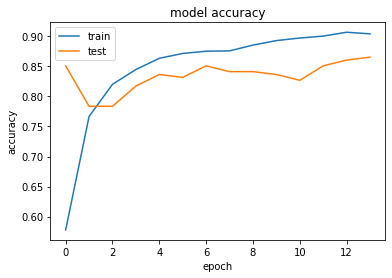

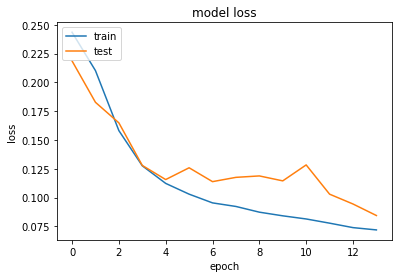

Iteration:8
=== Scores ===
Accuracy: 0.878261
Precision: 0.882883
Recall: 0.867257
F1 score: 0.875000
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.88      0.87      0.88       113

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

=== Confusion Matrix ===
[[104  13]
 [ 15  98]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 4)             0         
_________________________________________________________________


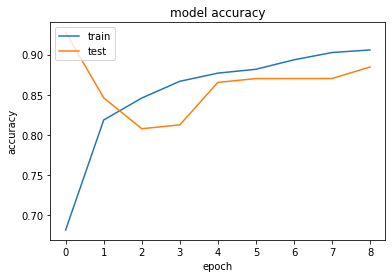

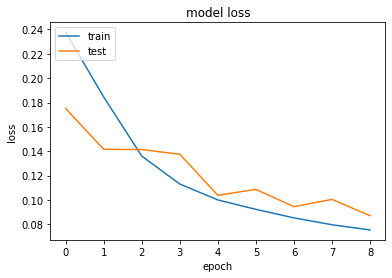

Iteration:9
=== Scores ===
Accuracy: 0.900000
Precision: 0.909091
Recall: 0.884956
F1 score: 0.896861
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       117
           1       0.91      0.88      0.90       113

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230

=== Confusion Matrix ===
[[107  10]
 [ 13 100]]


(2077, 24, 300)
(230, 24, 300)
(2077, 24, 300)
(230, 24, 300)
(24, 300)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 24, 4)             4880      
_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 4)             0         
_________________________________________________________________


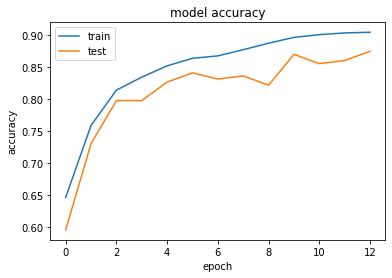

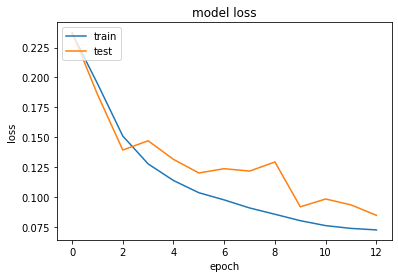

Iteration:10
=== Scores ===
Accuracy: 0.873913
Precision: 0.937500
Recall: 0.796460
F1 score: 0.861244
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       117
           1       0.94      0.80      0.86       113

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230

=== Confusion Matrix ===
[[111   6]
 [ 23  90]]




Averages
Accuracy: 0.8846979107848674
Precision: 0.8908149786626371
Recall: 0.8738317031516847
F1 measure: 0.8815277328182564
Confusion Matrix

[[105.   12.3]
 [ 14.3  99.1]]


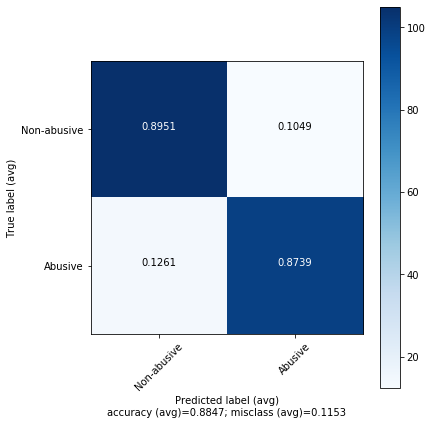

In [66]:
reset_seeds()
lstm_att = LSTM_Model_ATTENTION(xTrain, yTrain, target_names, class_names, 'LSTM (Glove) ',  _epochs = 35, _verbose=2, graph = True, _optimizer = Adam(lr=0.0001))

In [182]:
def Shape_Reshaper_ATT(_xTrain, _xTest): 

    print(_xTrain.shape)
    print(_xTest.shape)

    dim1, dim2, dim3 = _xTrain.shape    
    xTrain = _xTrain.reshape(dim1, dim2 * dim3)
    print(xTrain.shape)        
    t_dim1, t_dim2,  t_dim3 = _xTest.shape
   
    xTest = _xTest.reshape(t_dim1, t_dim2 * t_dim3)
    print(xTest.shape)

    vec_dim = dim2 * dim3
    vectors_words = dim2
    input_vec_size = dim1         
    return input_vec_size,vectors_words,vec_dim, xTrain, xTest

In [183]:
from keras.layers import LSTM, Dense
import numpy as np
def BiLSTM_Model(X, y, _target_names = [], _class_names = [], algoname= ' ', _loss='binary_crossentropy', _optimizer = Adam(lr=0.0001), _metrics=['accuracy'], _epochs = 25 , _validation_split = 0.1, _batch_size = 32, _verbose = 2, graph = False, _kernel_regularizer=l2(0.01), _bias_regularizer=l2(0.0001)):
    print("--------------- BiLSTM ---------------")  

    n_classes = 1
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=_seed)
    cfmean = []
    accmean = []
    precmean = []
    recmean = []
    f1mean = []
    
    
    count = 1
    for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X[train_index].astype('float32'), X[test_index].astype('float32')
        y_train, y_test = y[train_index].astype('int32'), y[test_index].astype('int32')
        

        input_vec_size,vectors_words,vec_dim, xTrain, xTest = Shape_Reshaper_ATT(X_train, X_test)


    
        model = Sequential()
        model.add(Embedding( vectors_words, input_vec_size, input_length=vec_dim))
        model.add(Bidirectional(LSTM(4, return_sequences=True)))

        model.add(Dense(16 ,activation='tanh'))
        model.add(Dropout(0.2))
        
        
        model.add(Flatten()) 
        model.add(Dense(n_classes ,activation='sigmoid'))
        model.summary()


        model.compile(loss=_loss, optimizer=_optimizer, metrics=_metrics)
        
        checkpoint_filepath = 'checkpoint.txt'
        callbacks = [ EarlyStoppingByLossVal(monitor='val_loss', value=.1, verbose=1),
                      ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', save_best_only=True, verbose=0)
                     ]
        
        
        
        history = model.fit(xTrain, y_train, epochs=_epochs)
        
        

        score = model.evaluate(xTest, y_test, verbose=1)
        print("Test Score:", score[0])
        print("Test Accuracy:", score[1])

        accuracy = model.evaluate(xTest, y_test,  verbose=_verbose)
        
        y_pred = model.predict_classes(xTest)
        
        
        if graph:
            Generate_Graph(history)
            
    
        
        
        
        print("Iteration:" + str(count))
        
        print("=== Scores ===")
        accuracy = accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy)
        precision = precision_score(y_test, y_pred )
        print('Precision: %f' % precision)
        recall = recall_score(y_test, y_pred)
        print('Recall: %f' % recall)
        f1 = f1_score(y_test, y_pred)
        print('F1 score: %f' % f1)
        
        accmean.append(accuracy)
        precmean.append(precision)
        recmean.append(recall)
        f1mean.append(f1)
        

        print("=== Classification Report ===")
        target_names = _target_names
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test, y_pred))
        cfmean.append(confusion_matrix(y_test, y_pred))
  
        print('\n')
        count = count + 1
        
        
    
    acc = np.mean(accmean, axis=0)
    pre = np.mean(precmean, axis=0)
    cm = np.mean(cfmean, axis=0)
    re = np.mean(recmean, axis=0)
    f1 = np.mean(f1mean, axis=0)
    
    print('\n')
    print("Averages")
    print("Accuracy: " + str(acc))
    print("Precision: " + str(pre))
    print("Recall: " + str(re))
    print("F1 measure: " + str(f1))
    print('Confusion Matrix\n')
    print(cm)
    
    

    #plot graph
    class_names = _class_names
    plot_confusion_matrix(cm, target_names=class_names,title='')
    plt.show()
    
    return model, kfold        
        

In [ ]:
reset_seeds()
bilstm = BiLSTM_Model(xTrain, yTrain, target_names, class_names, 'BiLSTM (Glove) ',  _epochs = 1, _verbose=2, graph = True, _optimizer = 'Adam')

In [326]:
Xtest = Generate_Glove_Vectors(w2vec_model, df.comment.tolist(), word_size = 75)

(2307, 75, 300)


In [327]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
# load model
model = load_model('model.h5')
# summarize model.
model.summary()


Model: "sequential_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_111 (Conv1D)          (None, 75, 4)             1204      
_________________________________________________________________
dropout_600 (Dropout)        (None, 75, 4)             0         
_________________________________________________________________
max_pooling1d_82 (MaxPooling (None, 75, 4)             0         
_________________________________________________________________
dropout_601 (Dropout)        (None, 75, 4)             0         
_________________________________________________________________
dense_519 (Dense)            (None, 75, 16)            80        
_________________________________________________________________
dropout_602 (Dropout)        (None, 75, 16)            0         
_________________________________________________________________
dense_520 (Dense)            (None, 75, 32)         

In [328]:
# evaluate the model
score = model.evaluate(Xtest, df.find_abusive.tolist(), verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 90.81%


In [329]:
y_pred_cnn = model.predict_classes(Xtest)

In [330]:
print(y_pred_cnn[0:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [331]:
Xtest = tfIdfVectorizer.transform(train_text).toarray()

In [332]:
loaded_model = pickle.load(open("dt-context.sav", 'rb'))
y_pred = loaded_model.predict(Xtest)

In [333]:
df['ngram-predictions'] = y_pred 

In [334]:
df['glove-predictions'] = y_pred_cnn 

In [335]:
df_final = df[['id','comment','find_abusive','ngram-predictions','glove-predictions']].copy()

In [345]:
df_compare = df_final[(df_final['find_abusive'] != df_final['ngram-predictions'])]

In [346]:
df_compare.shape

(35, 5)

In [347]:
df_compare.head(10)

,id,comment,find_abusive,ngram-predictions,glove-predictions
1060,Ugiv5kgLZY0Wu3gCoAEC,She beautiful idkwhy wasted life like,0,1,0
1070,UgxR_f6jcgnjrMtdgpt4AaABAg,She state attorney guy kept composure told wrong,0,1,0
1075,UgzEXcpxHDOzV7B-Tl94AaABAg,Taping someones mouth shut Court Law FUCKED UP...,0,1,0
1079,Ugz4uSQFu3jCw3CT89p4AaABAg,Would anyone need permit sell stuff streets tho,0,1,0
1081,UgzQRMjxfBNrG_GAjSh4AaABAg,That woman displaying much racist well badly w...,0,1,1
1085,UgzSExZBWVsD05noA1R4AaABAg,I feel like Judge innocent He treated respect,0,1,0
1096,Ugx1nrV9lhHRd4kp_Ot4AaABAg,Throw book sentence max lol I love,0,1,0
1105,UgijD8ycWpCw8XgCoAEC,Like religious groups Islamic ones first viola...,0,1,0
1126,UgxMrxOgolhNCgz5eo54AaABAg,The car lot closed officially Thats happens hi...,0,1,0
1127,UgwR7kEbmEgOUHoeJ5x4AaABAg,I would like see judge forced becoming sex sla...,0,1,1


In [348]:
df_compare.to_csv("error_analysis_context.tsv", sep='\t', index=False)
print("File Saved!") 

File Saved!
